# Part 1

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



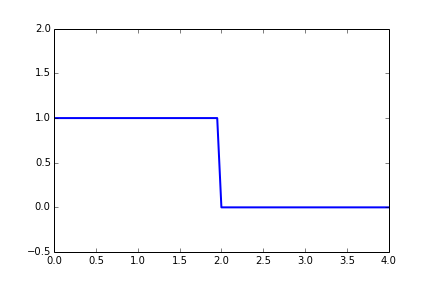
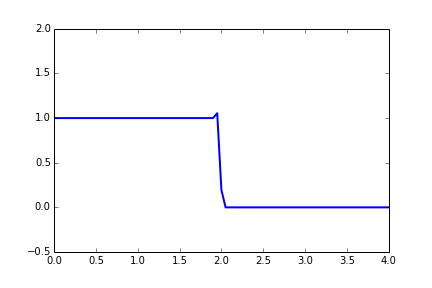
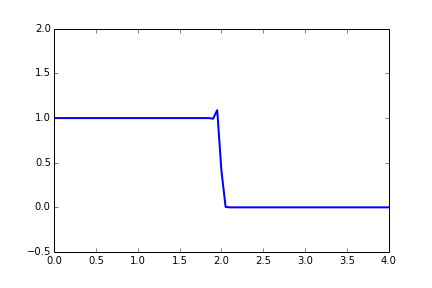
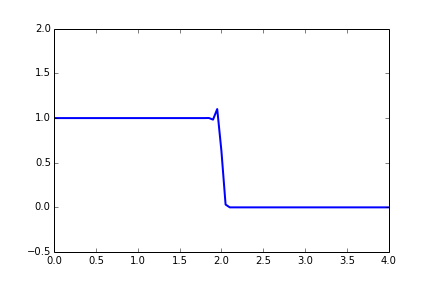
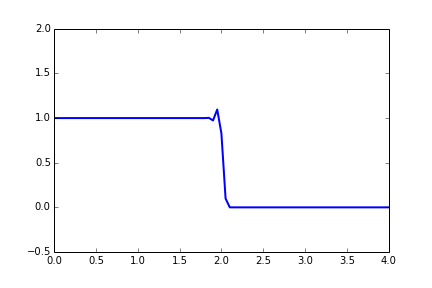
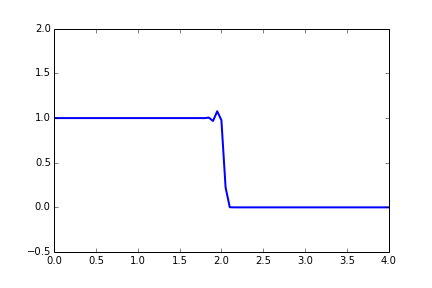
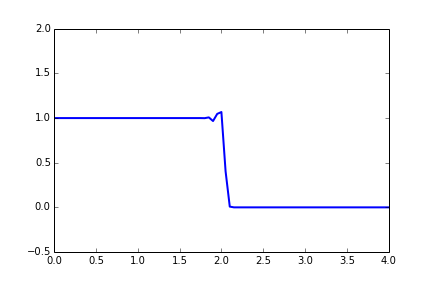
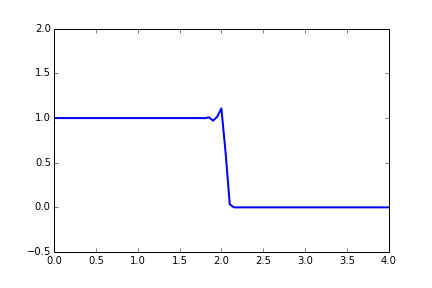
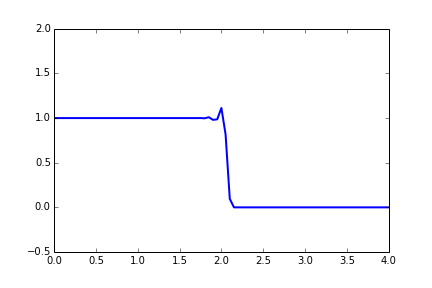
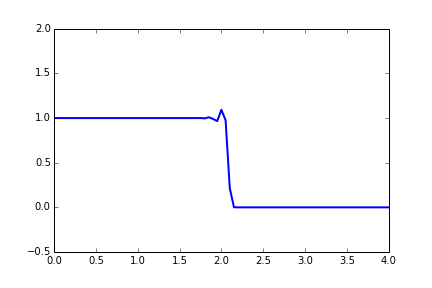
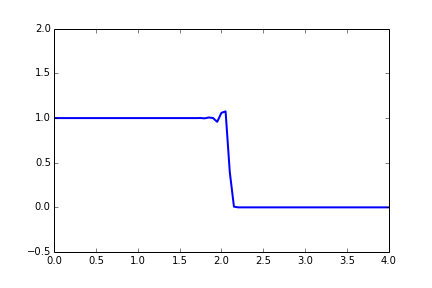
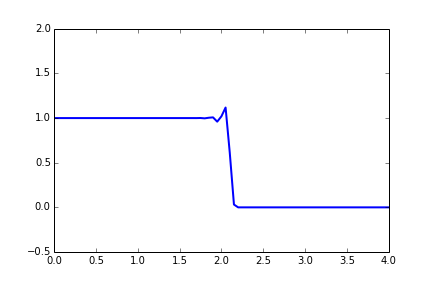
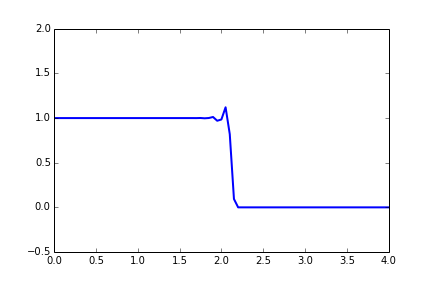
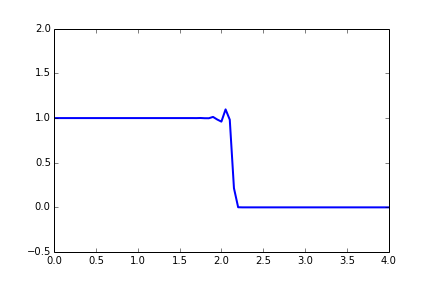
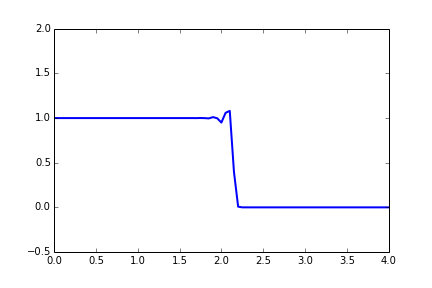
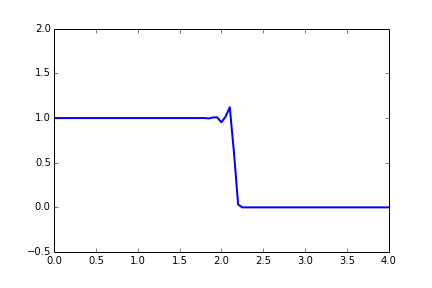
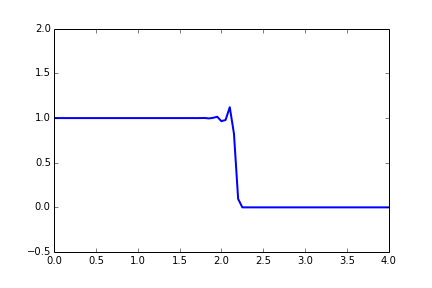
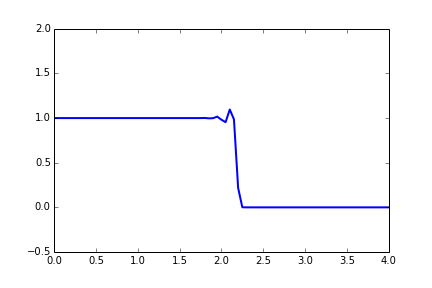
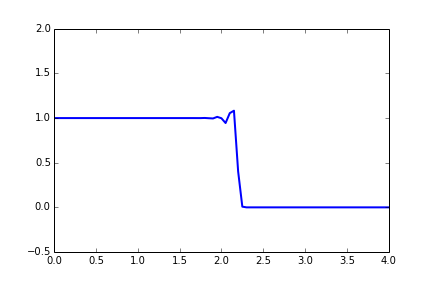
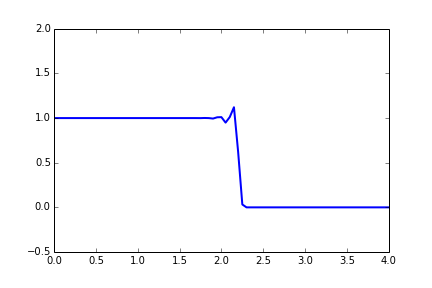
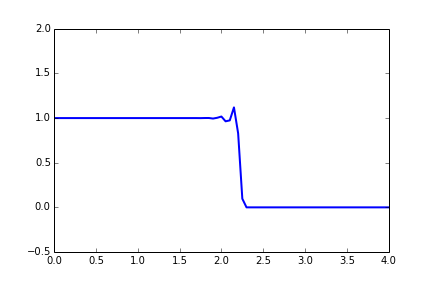
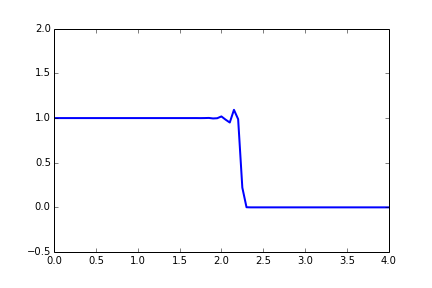
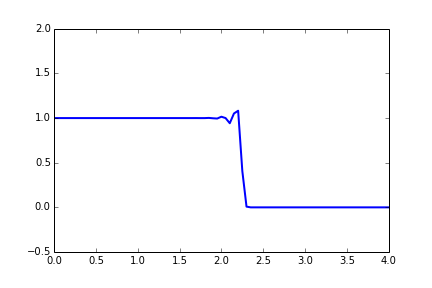
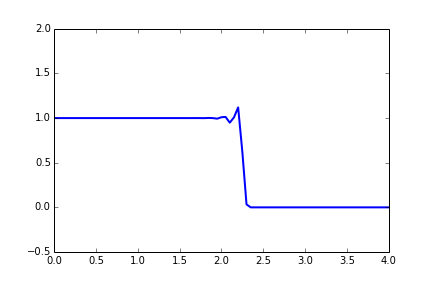
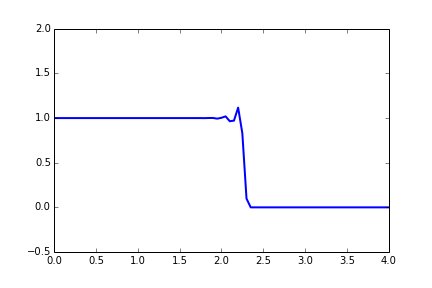
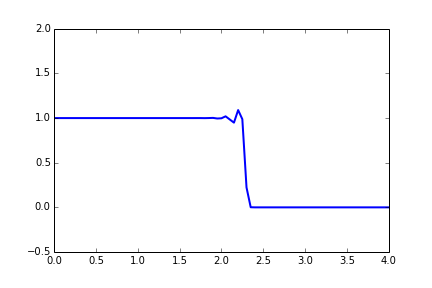
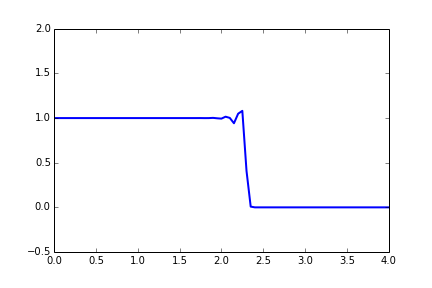
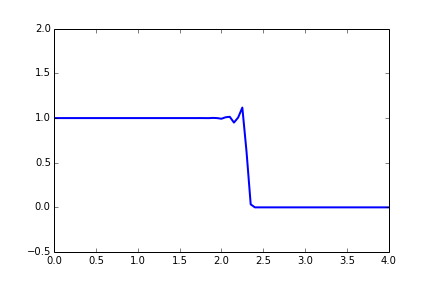
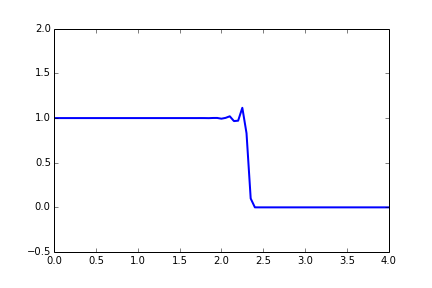
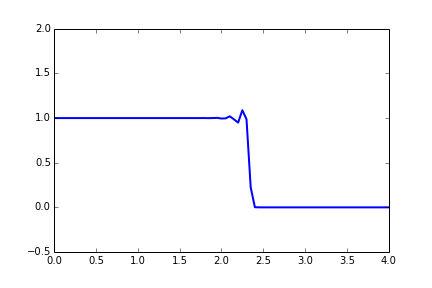
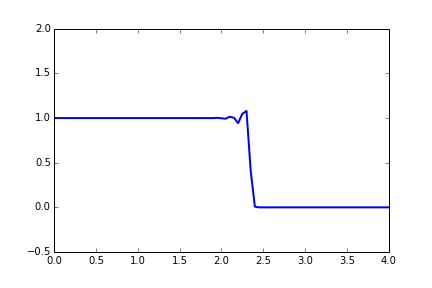
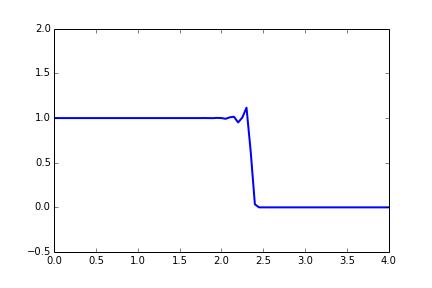
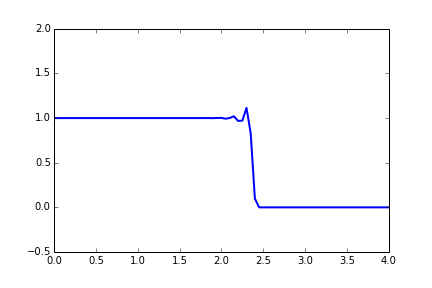
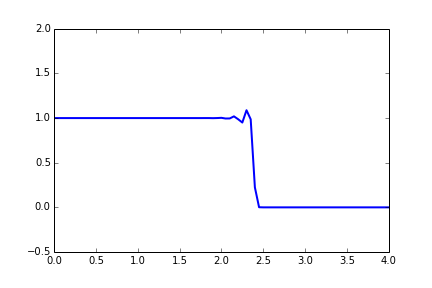
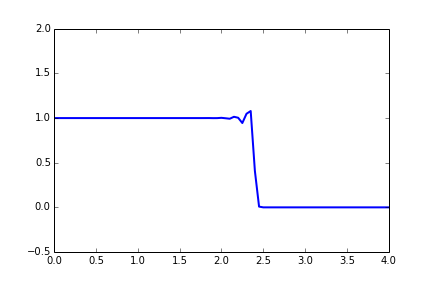
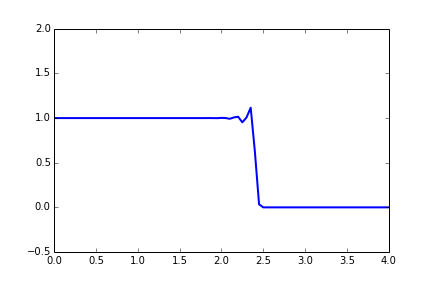
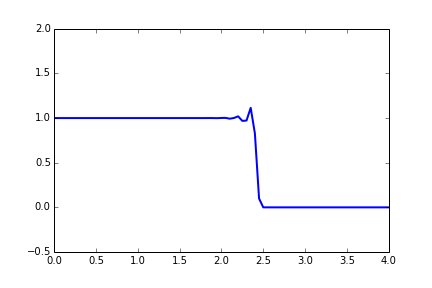
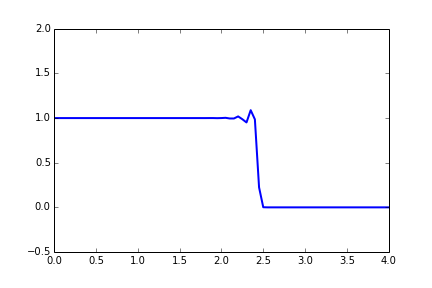
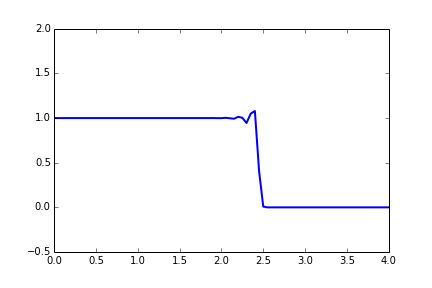
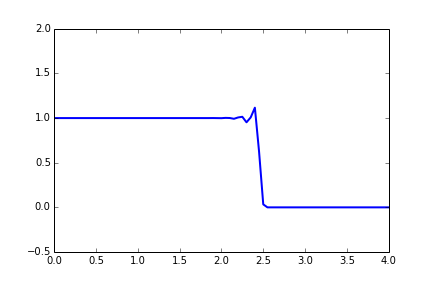
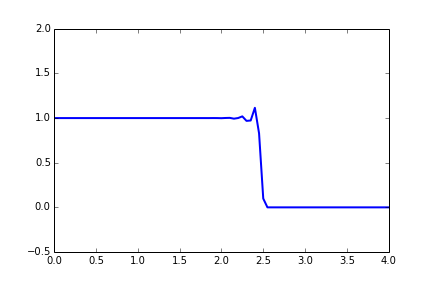
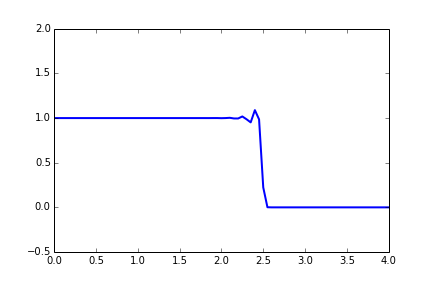
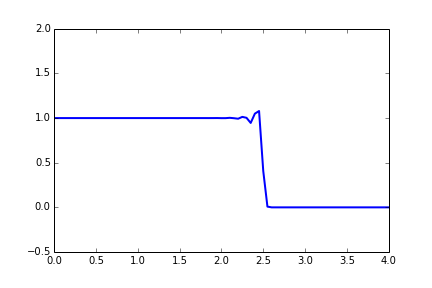
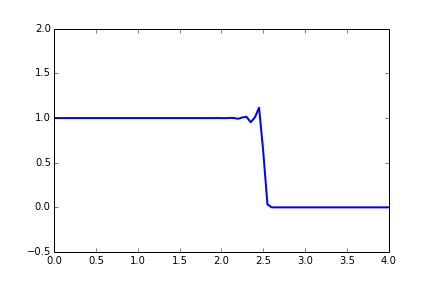
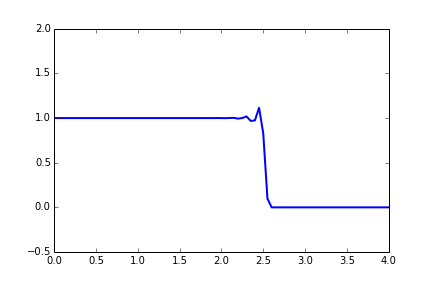
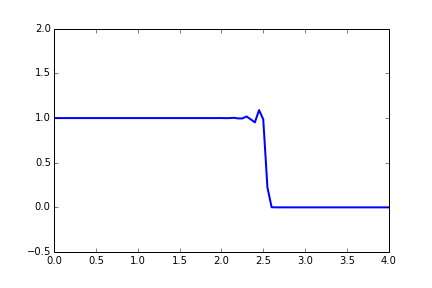
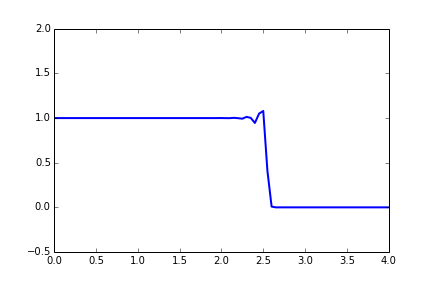
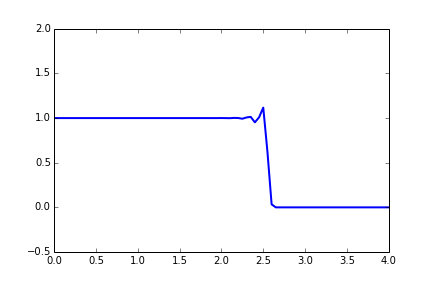
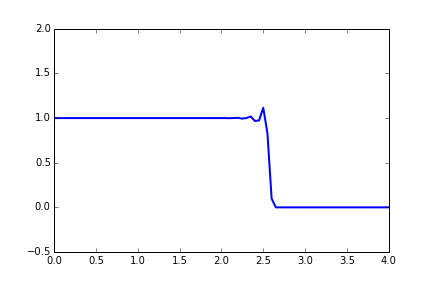
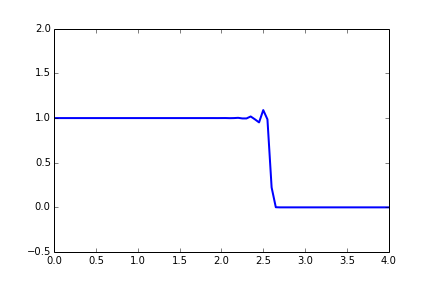
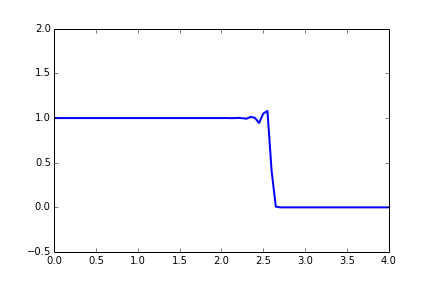
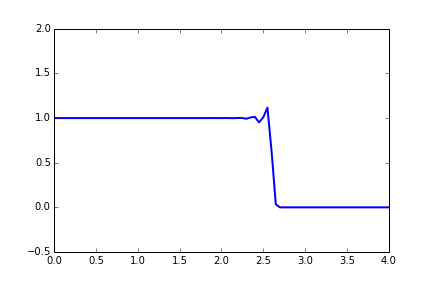
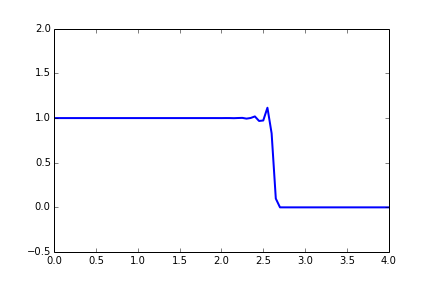
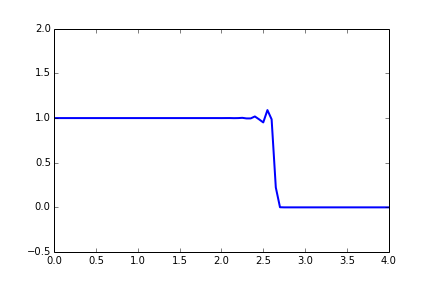
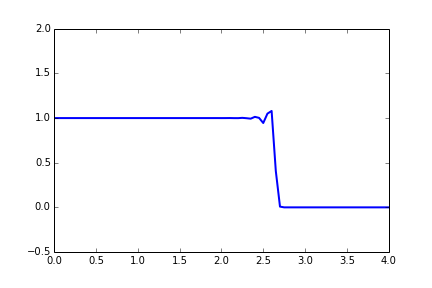
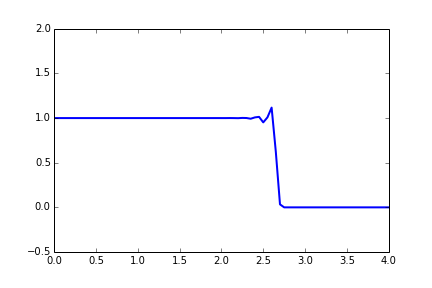
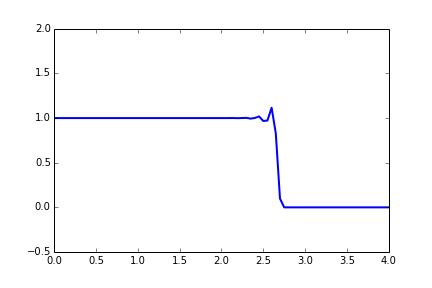
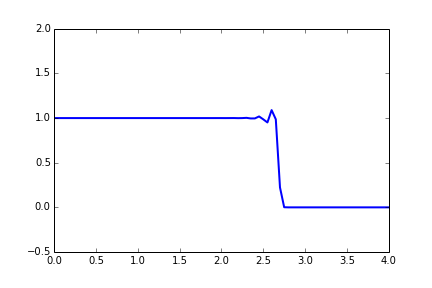
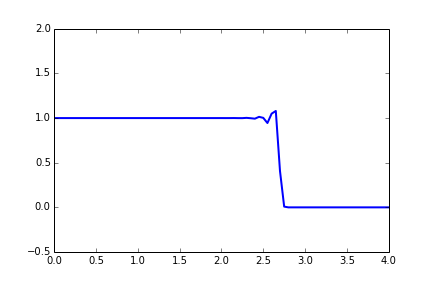
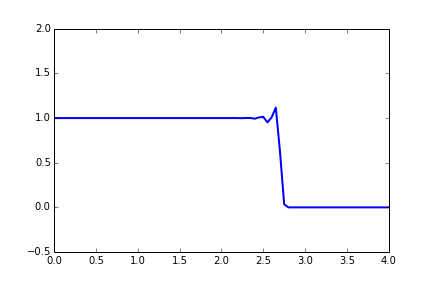
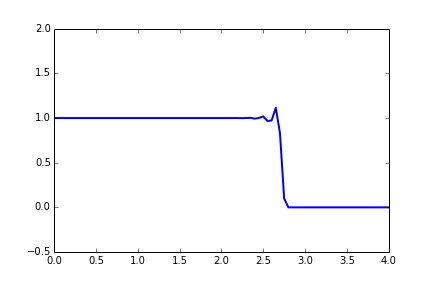
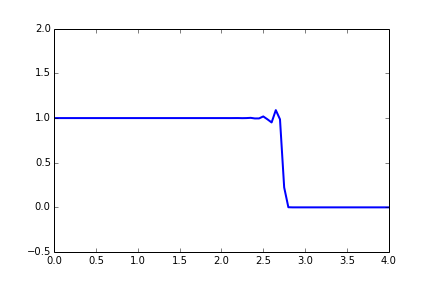
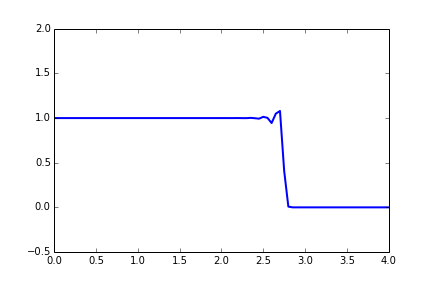
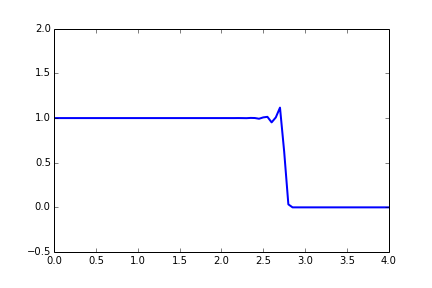
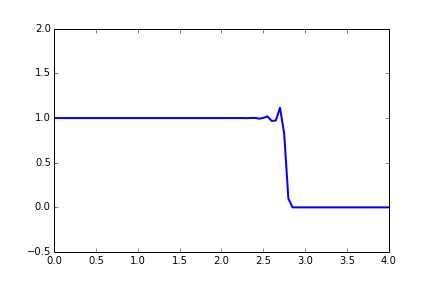
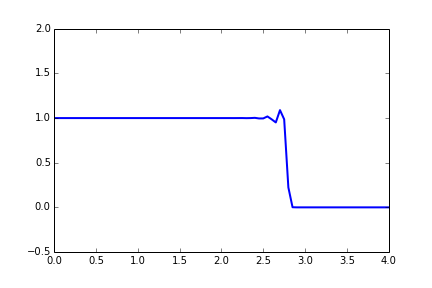
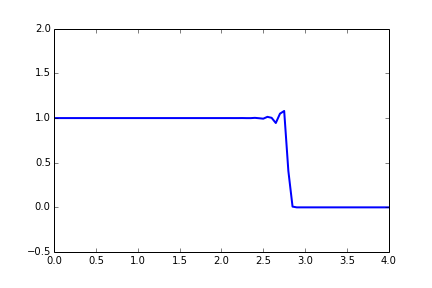
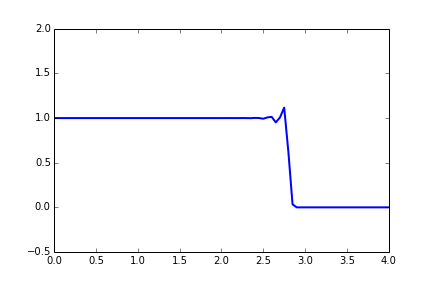
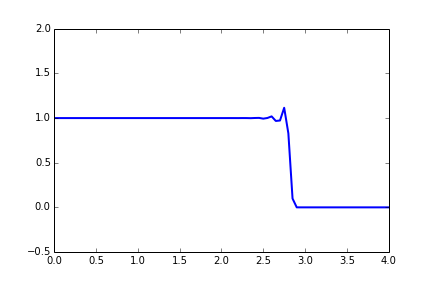
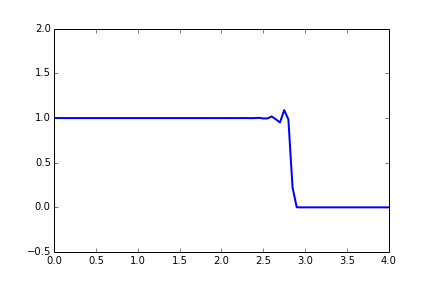
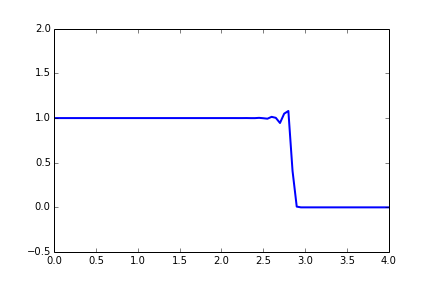
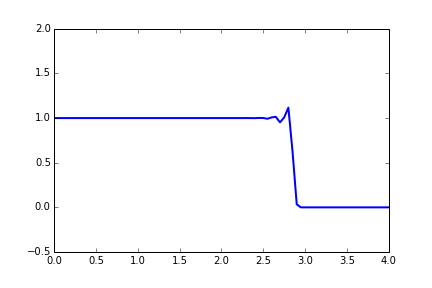
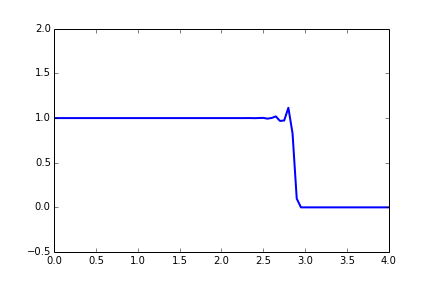
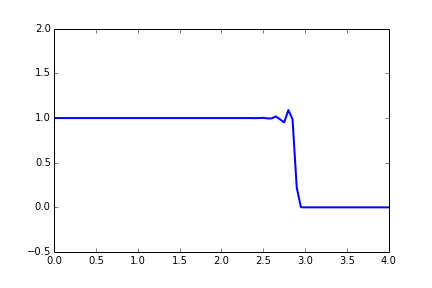
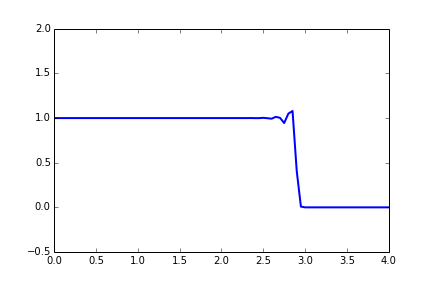
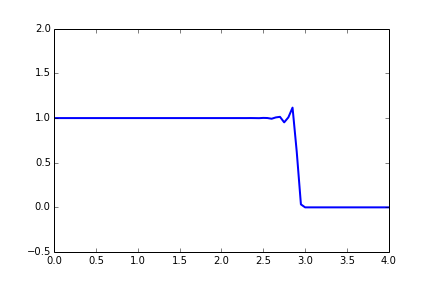
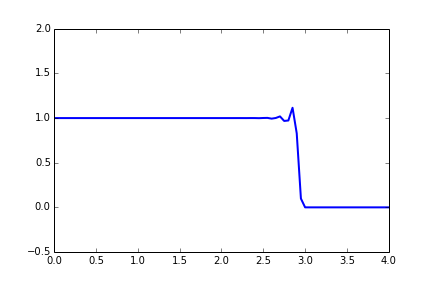
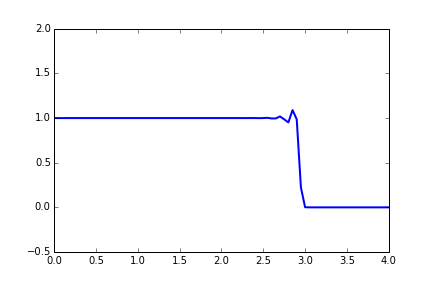
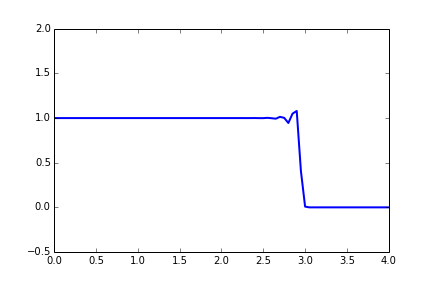
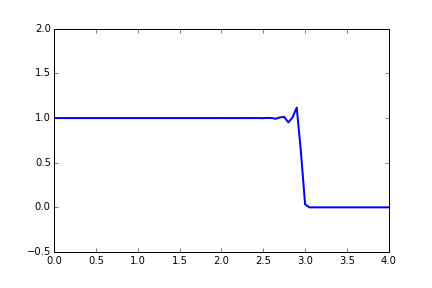
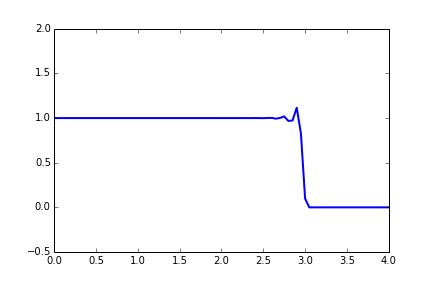
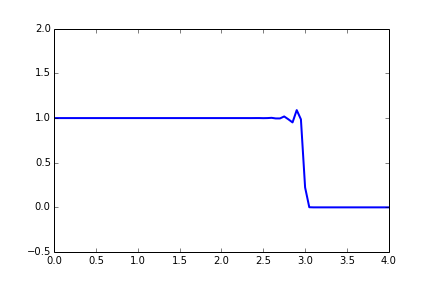
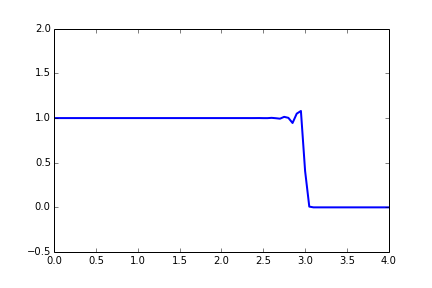
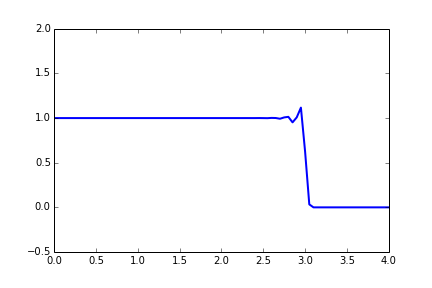
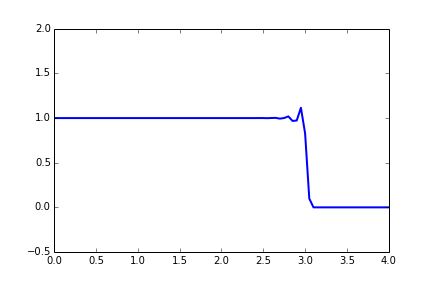
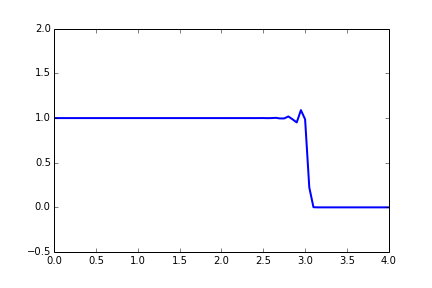
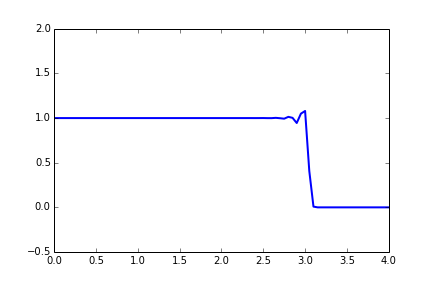
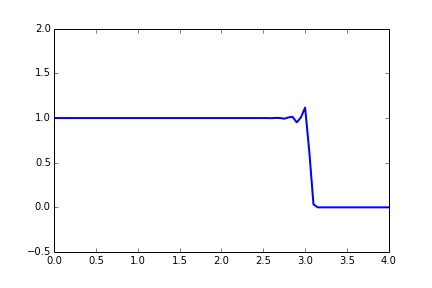
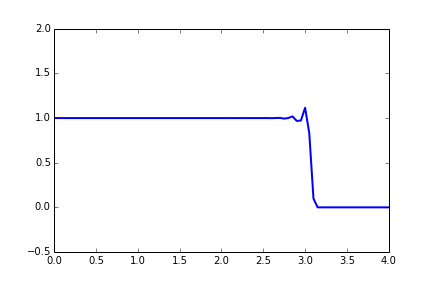
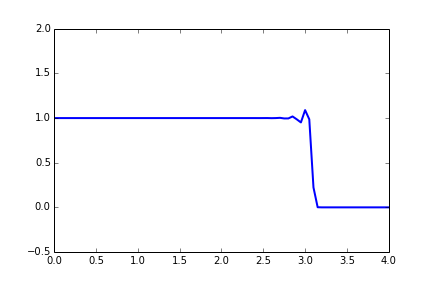
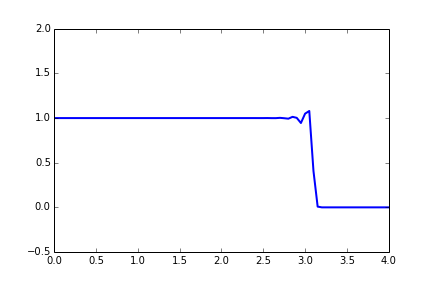
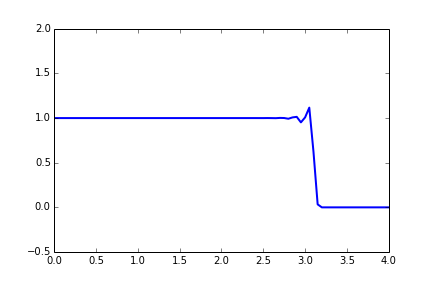
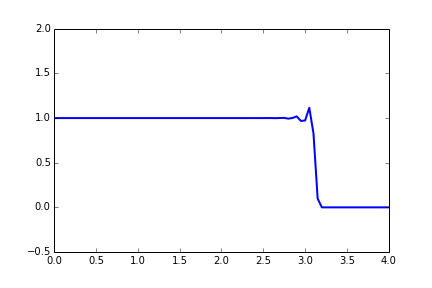
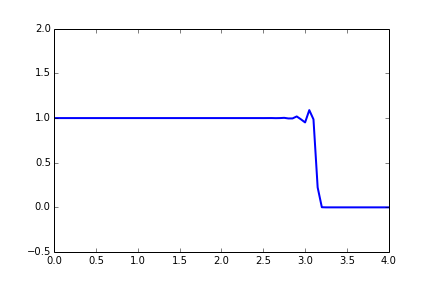
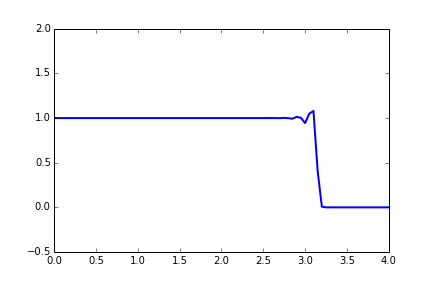
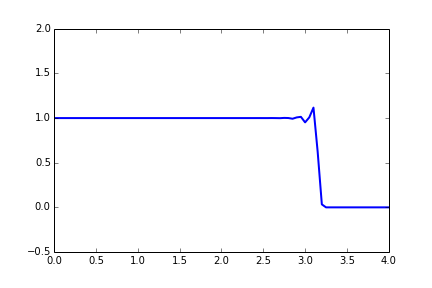
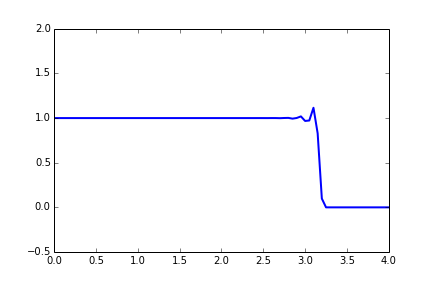
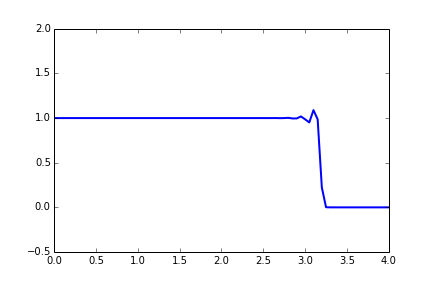
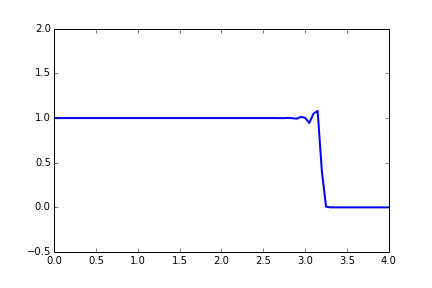
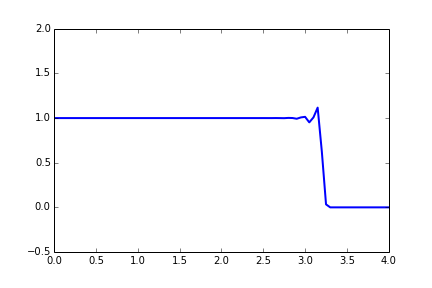
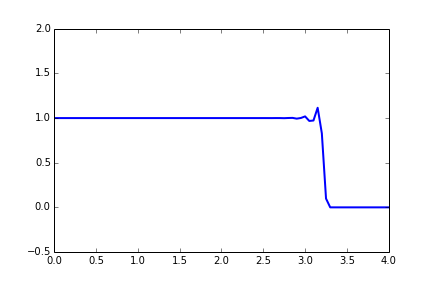
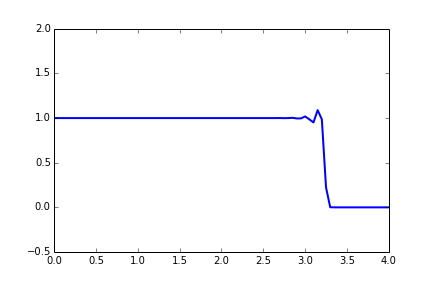
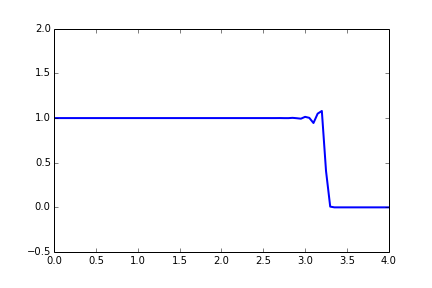
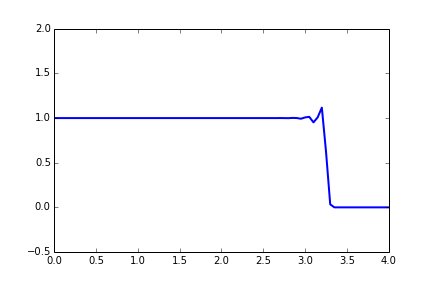
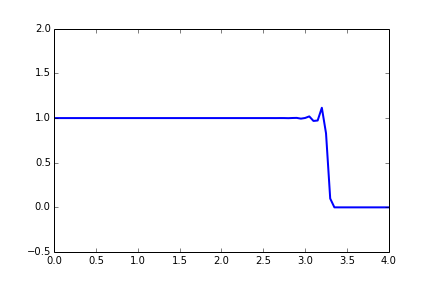
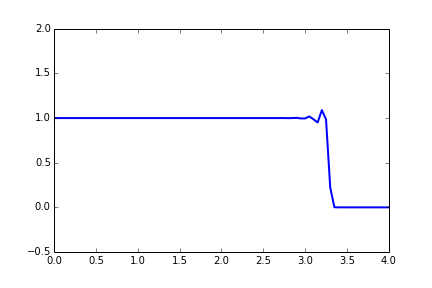
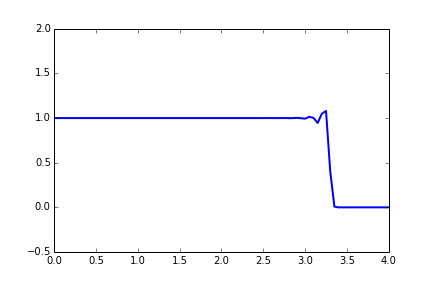
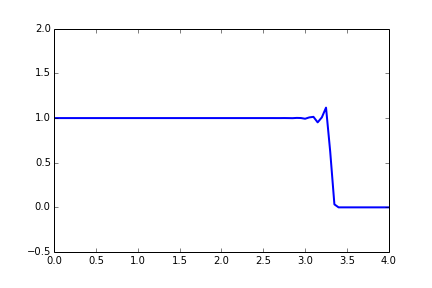
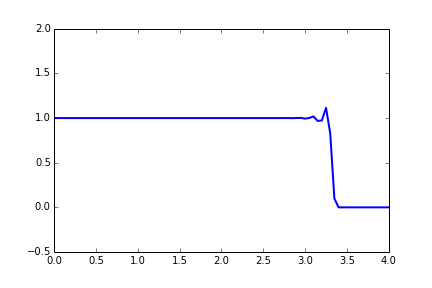
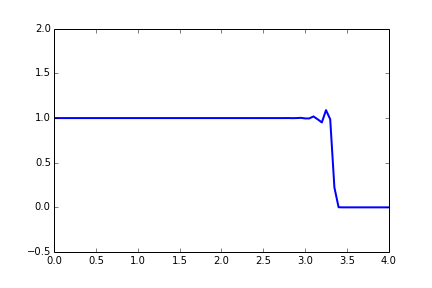
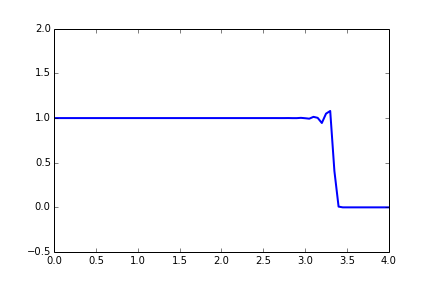
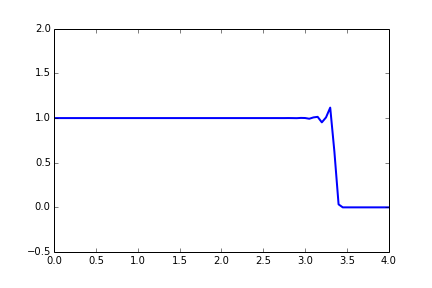
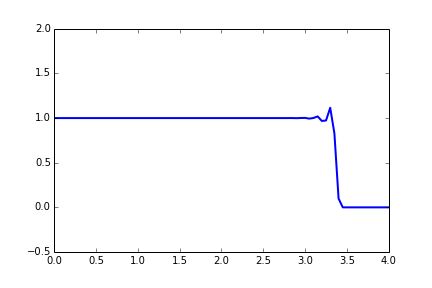
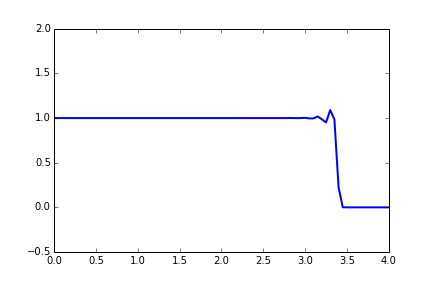
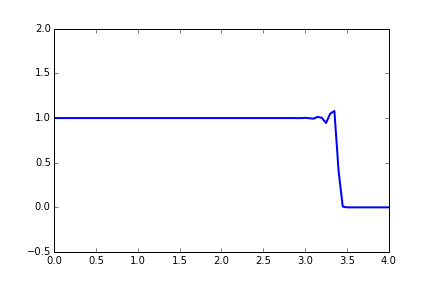
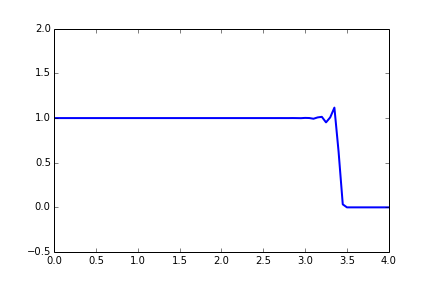
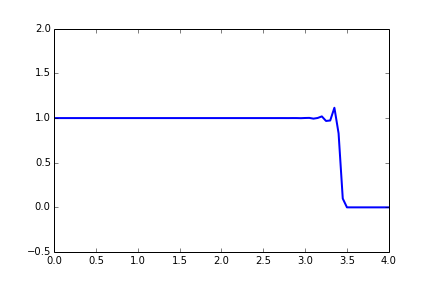
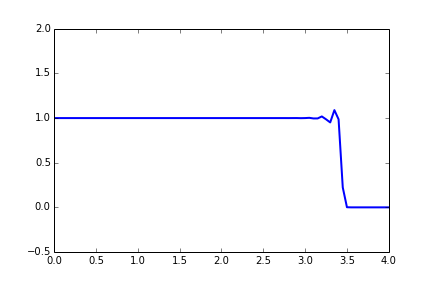
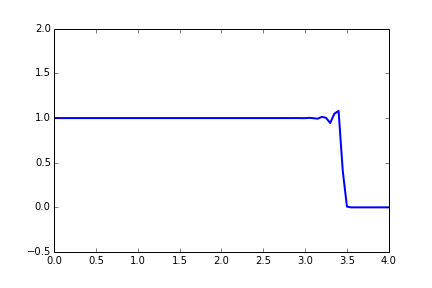
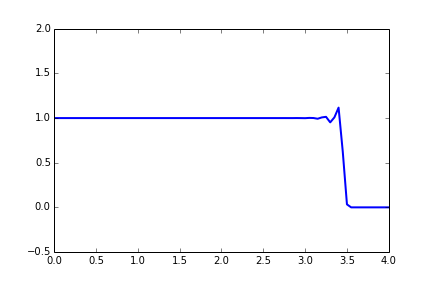
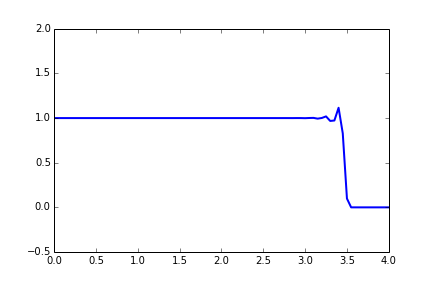
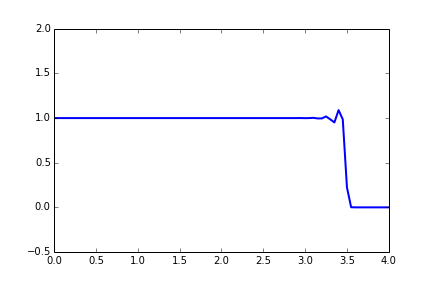
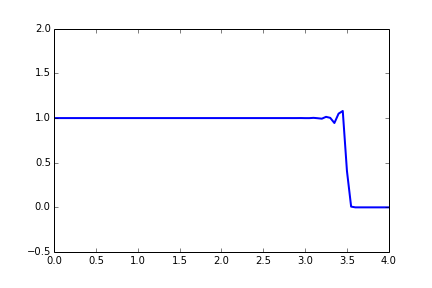
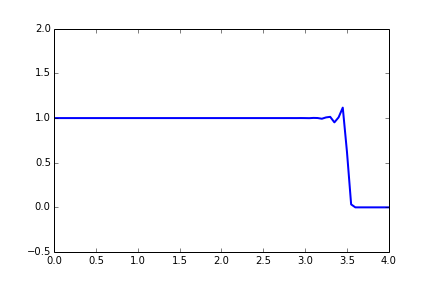
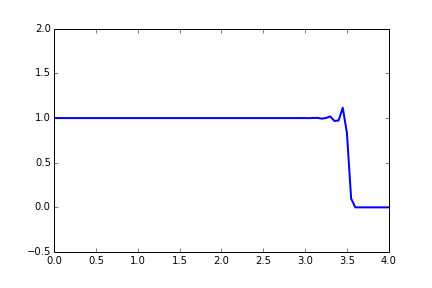
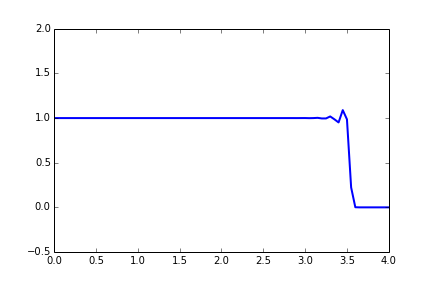
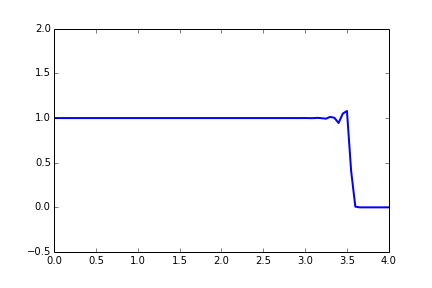
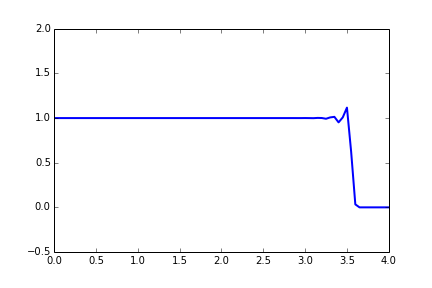
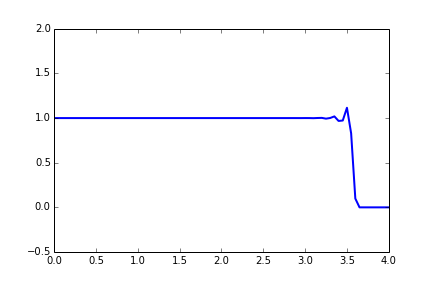
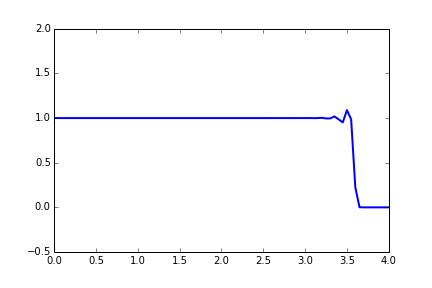
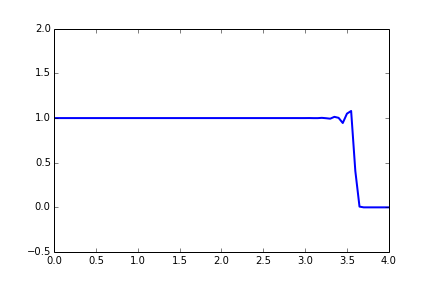
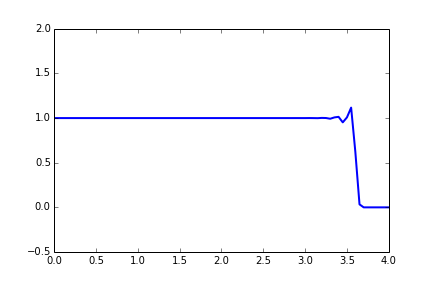
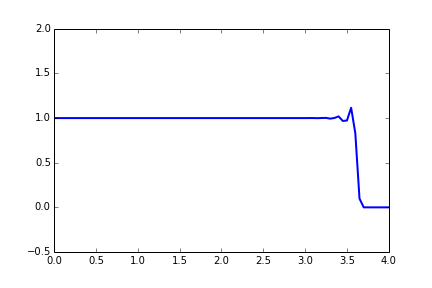
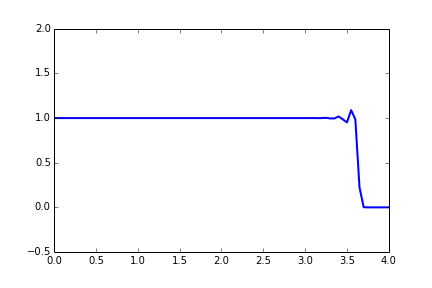
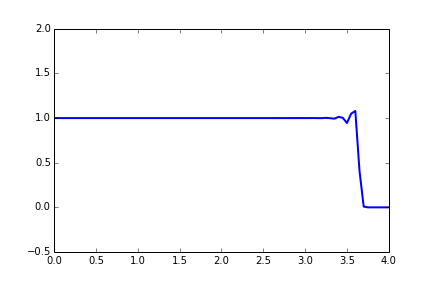
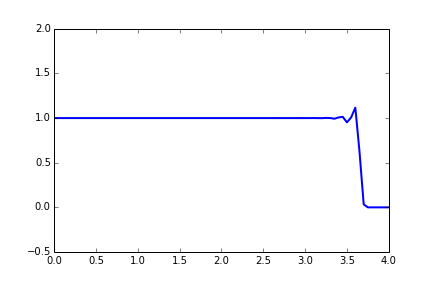
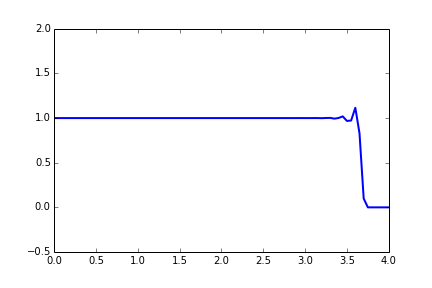
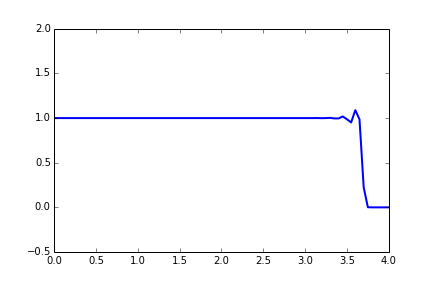
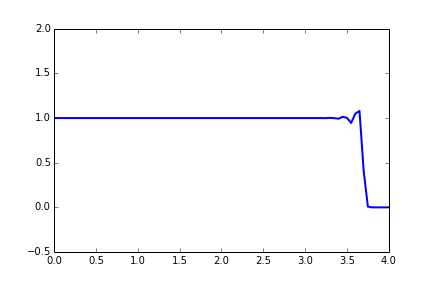
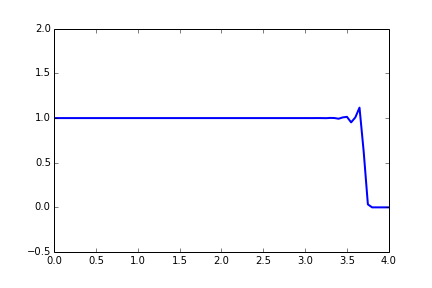

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
nx = 81
nt = 140
dx = 4.0/(nx-1)

x = np.linspace(0,4,nx)

def u_initial(nx):
    u = np.ones(nx)
    u[nx/2:]=0
    return u

def computeF(u):
    return u**2/2.

def maccormack(u, nt, dt, dx):
    un = np.zeros((nt, len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    for t in range(1,nt):
        F = computeF(u)
        ustar[:-1] = u[:-1]-dt/dx*(F[1:] - F[:-1])
        Fstar = computeF(ustar)
        un[t,1:]=0.5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:] - Fstar[:-1]))
        u = un[t].copy()
    return un

u = u_initial(nx)
sigma = .5
dt = sigma*dx

def animate(data):
    x = np.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

un = maccormack(u,nt,dt,dx)

fig=plt.figure()
ax = plt.axes(xlim=(0,4), ylim=(-0.5, 2))
line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, animate, frames=un, interval=30)
display_animation(anim, default_mode='loop')

# Part 2
MacCormack damping

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



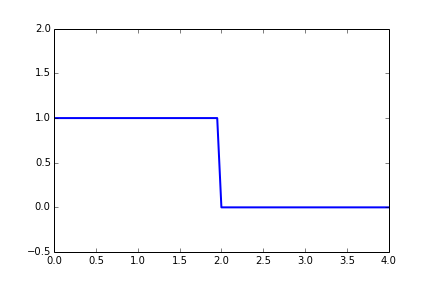
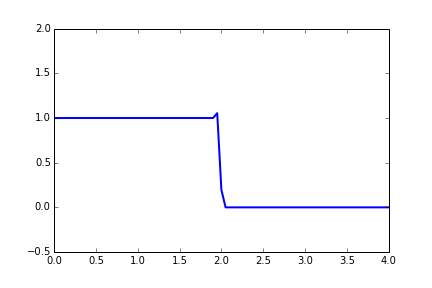
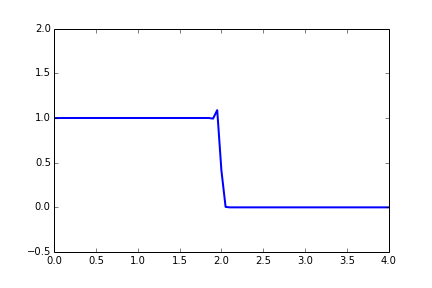
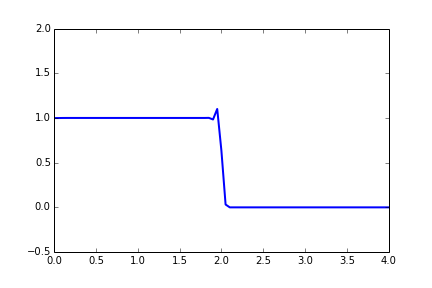
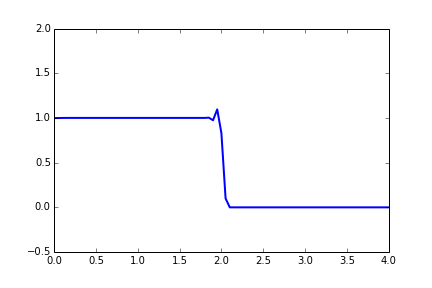
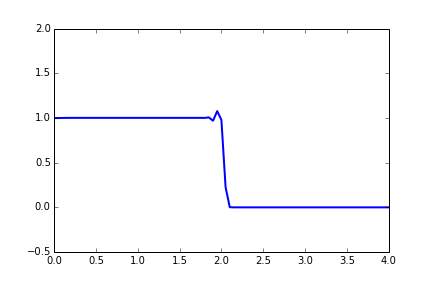
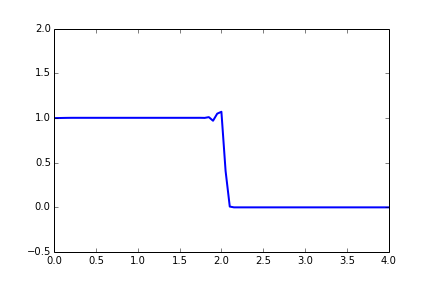
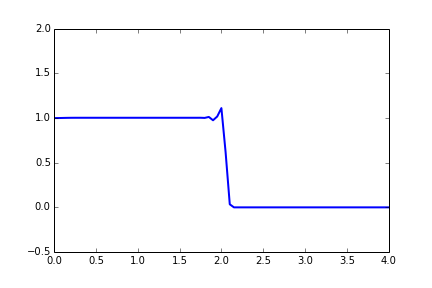
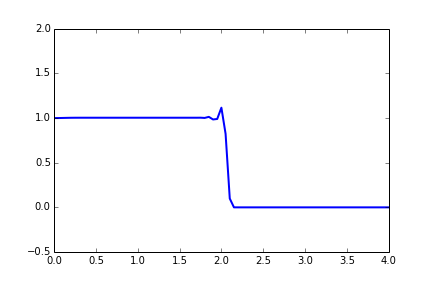
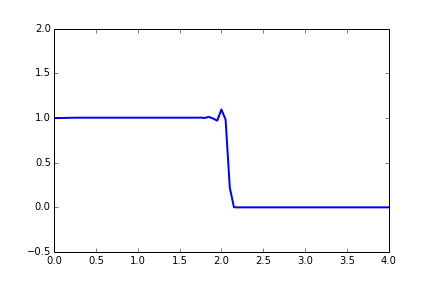
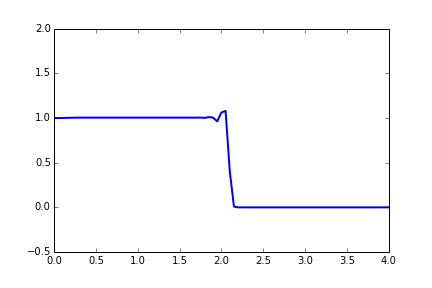
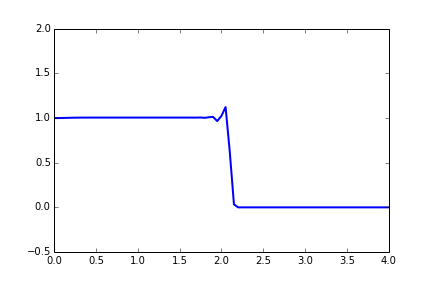
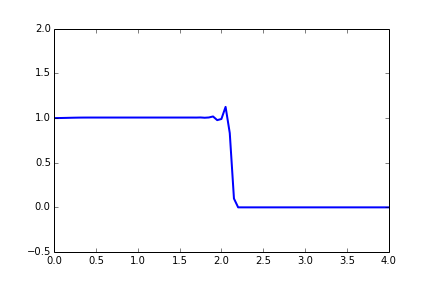
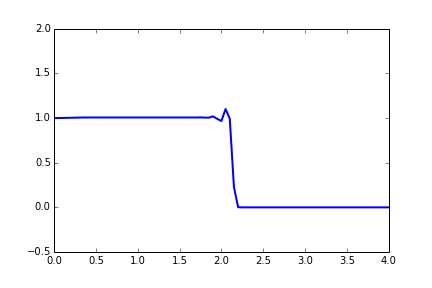
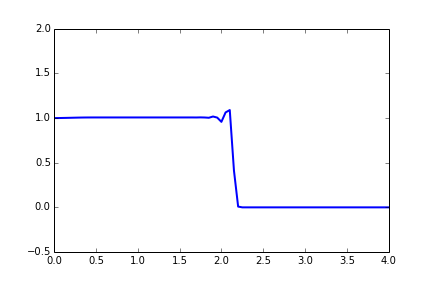
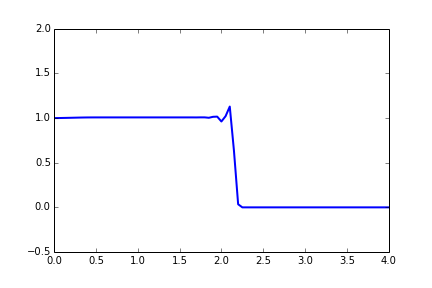
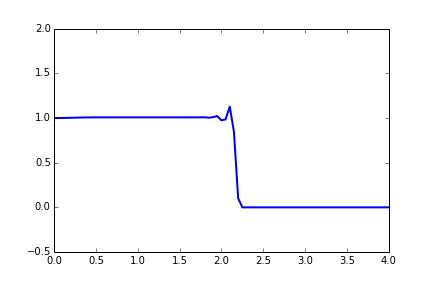
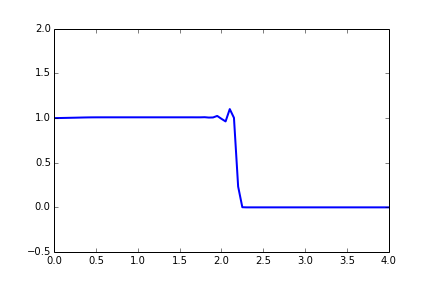
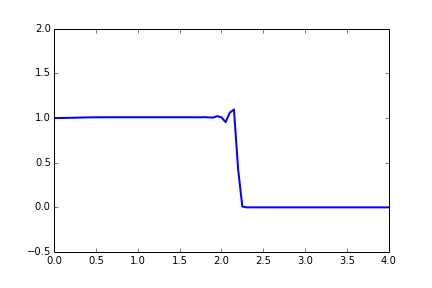
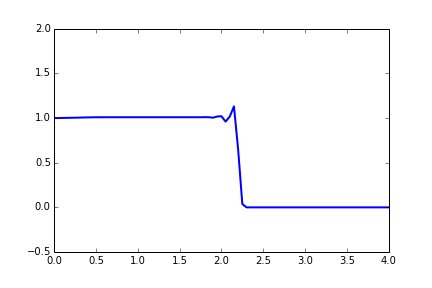
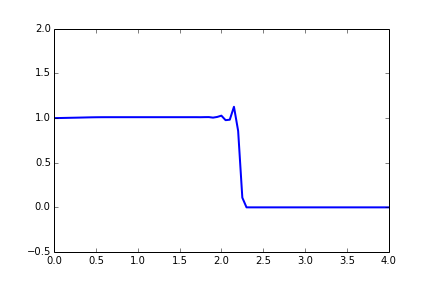
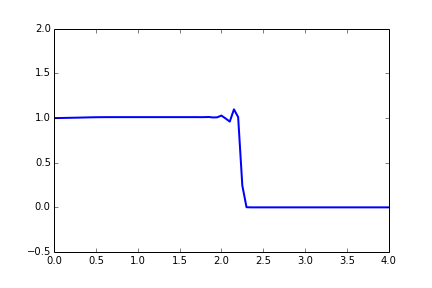
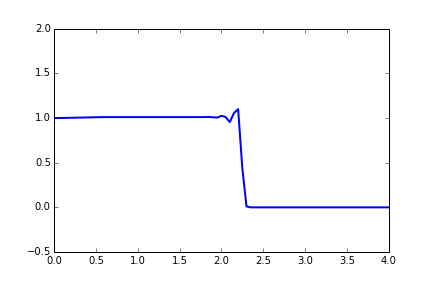
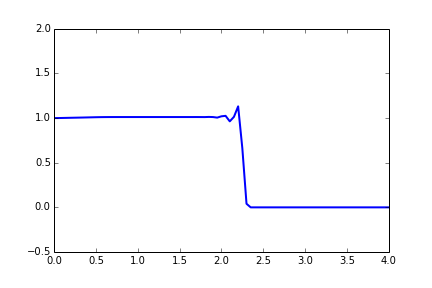
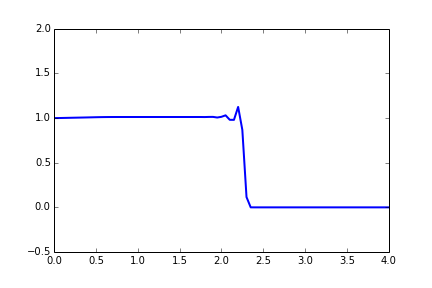
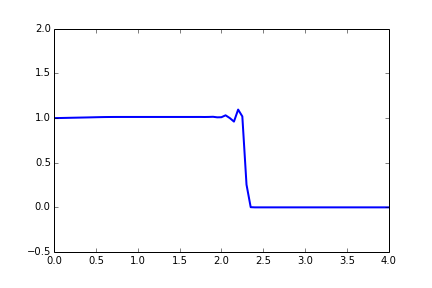
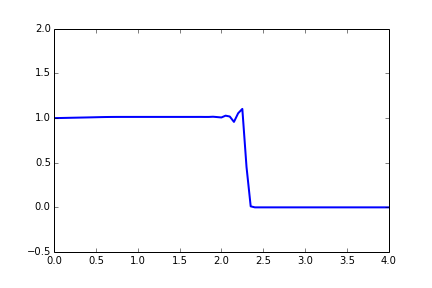
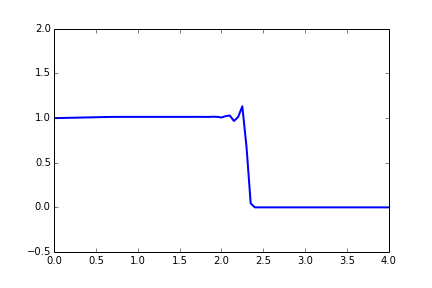
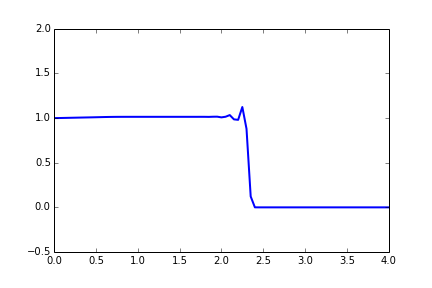
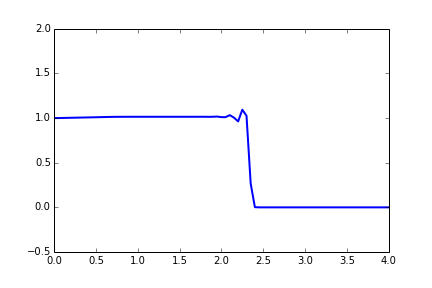
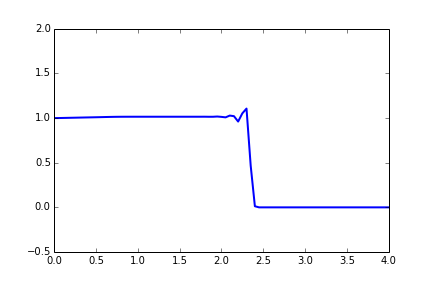
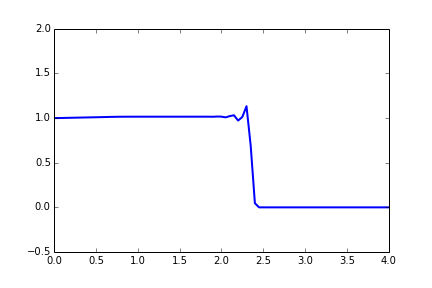
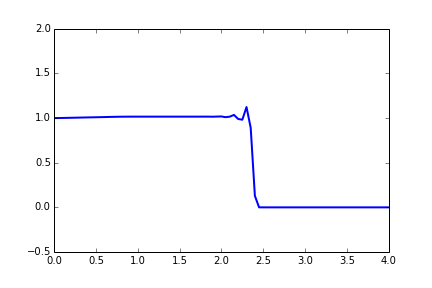
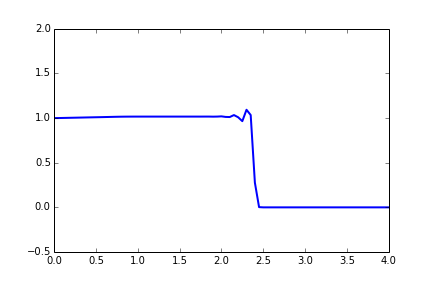
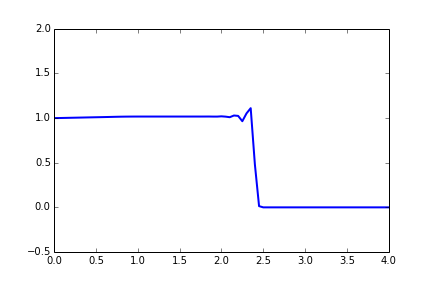
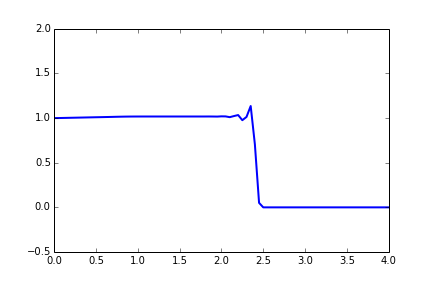
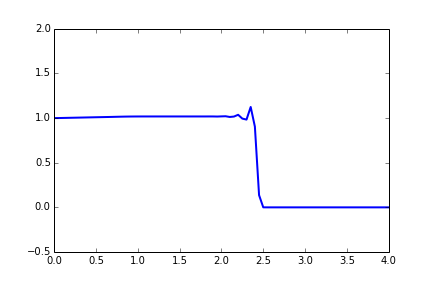
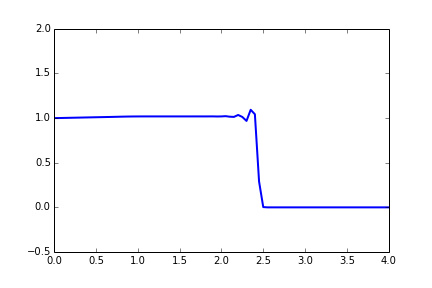
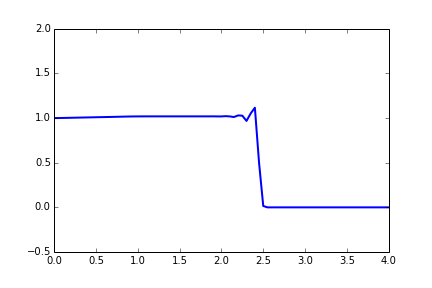
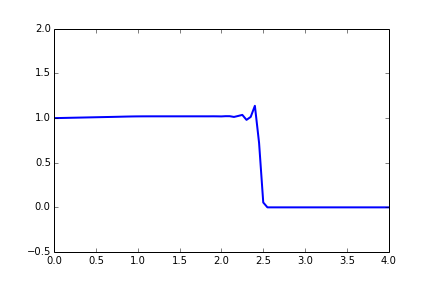
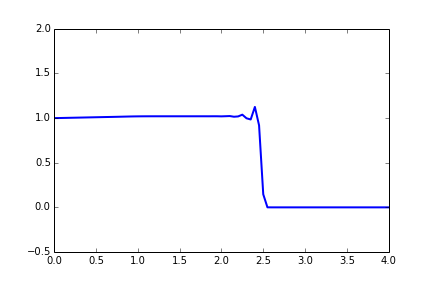
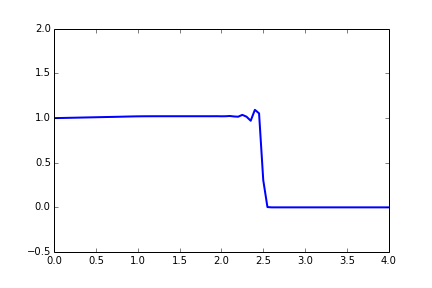
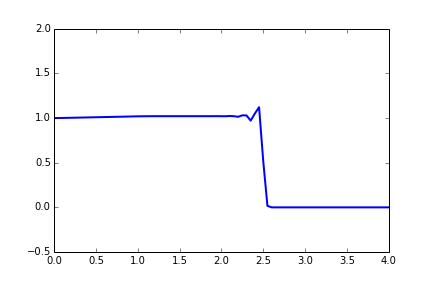
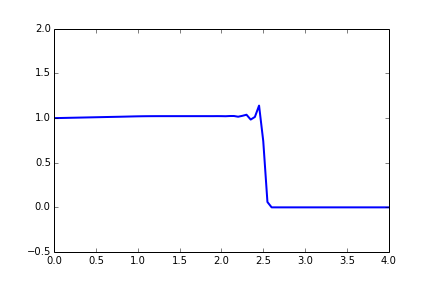
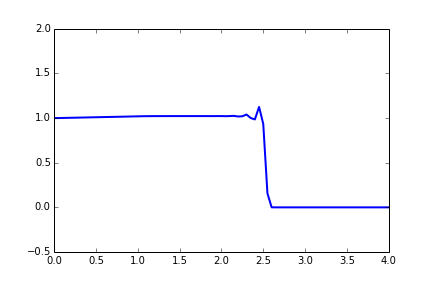
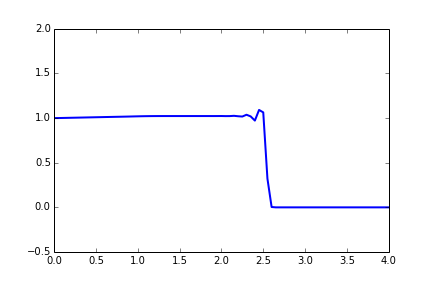
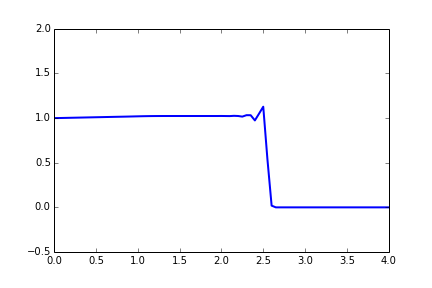
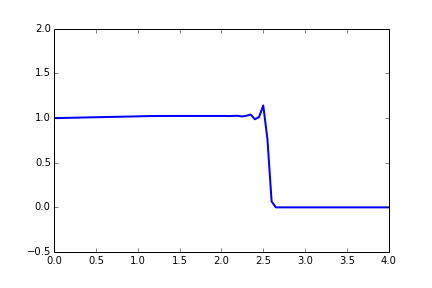
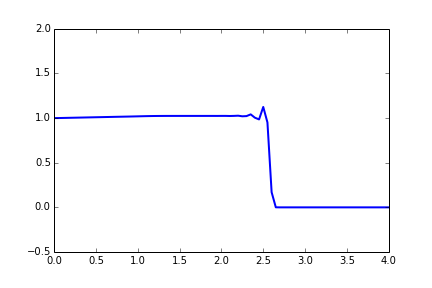
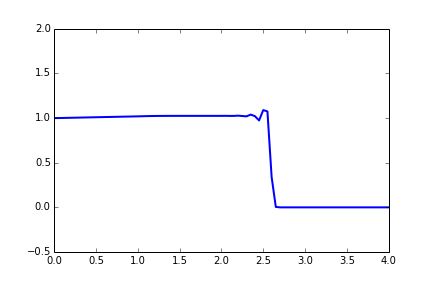
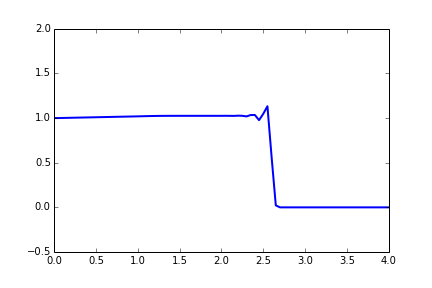
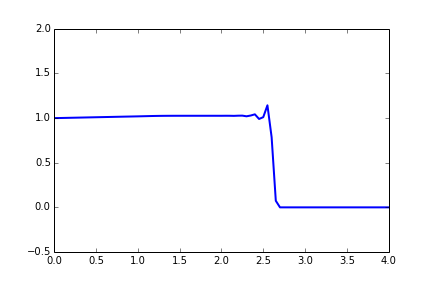
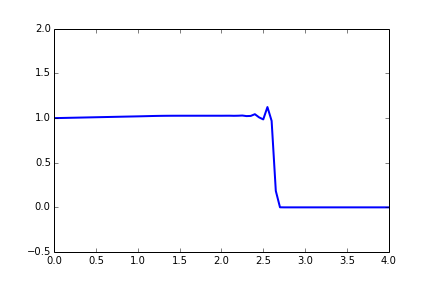
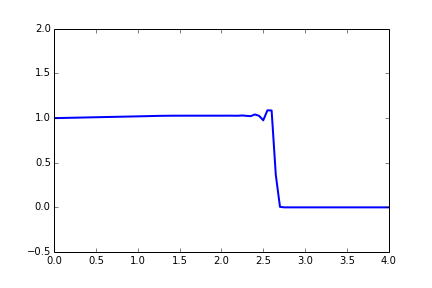
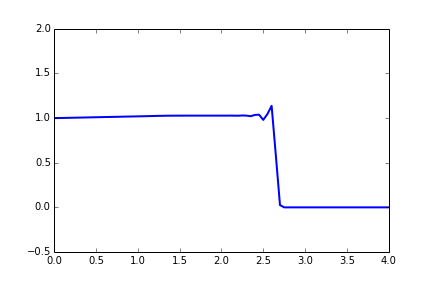
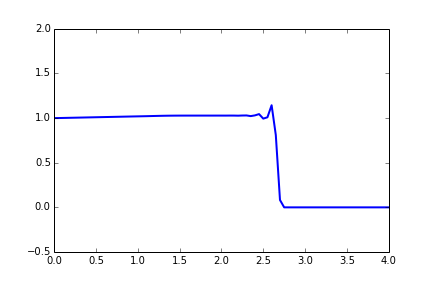
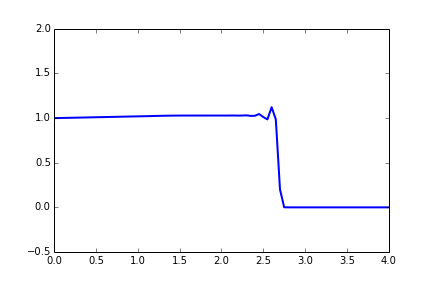
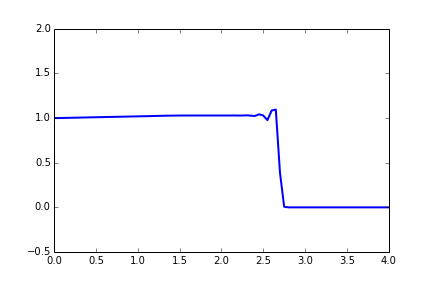
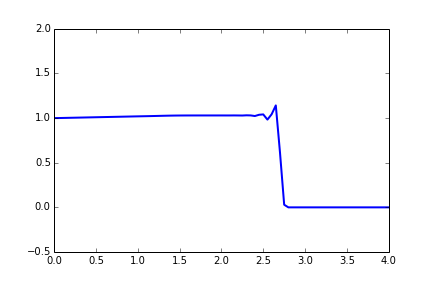
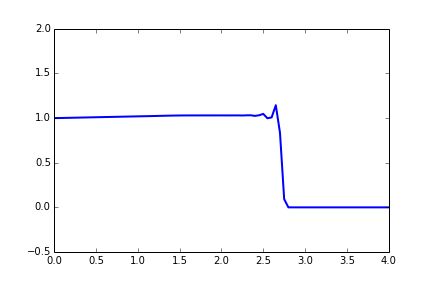
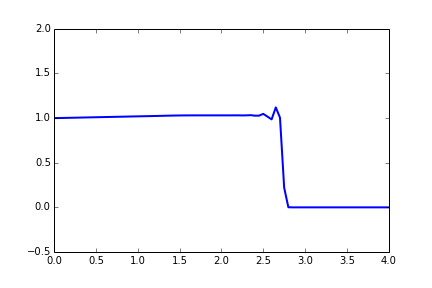
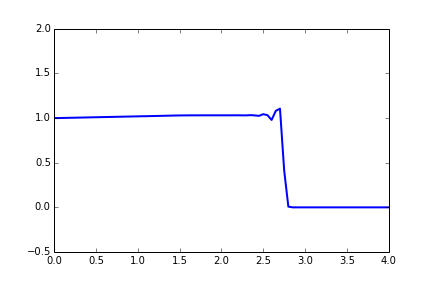
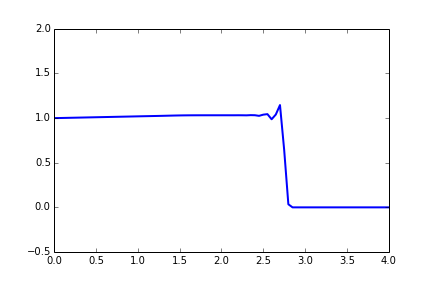
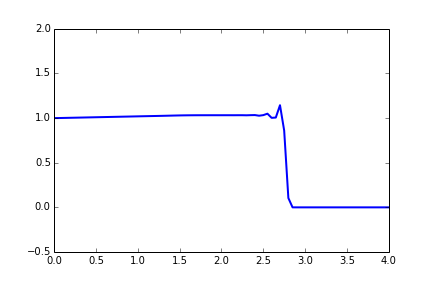
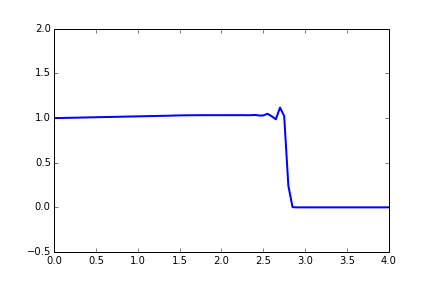
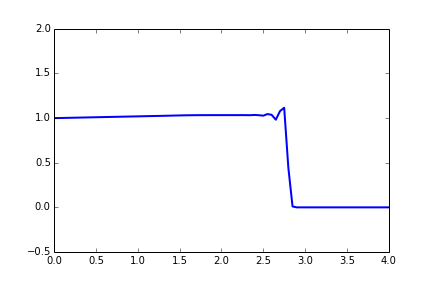
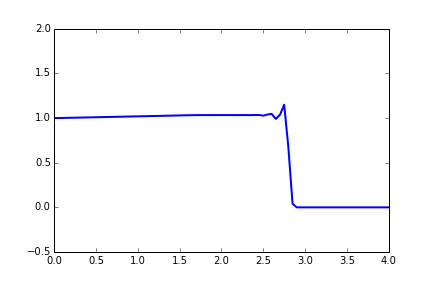
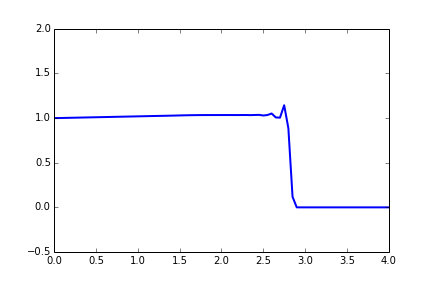
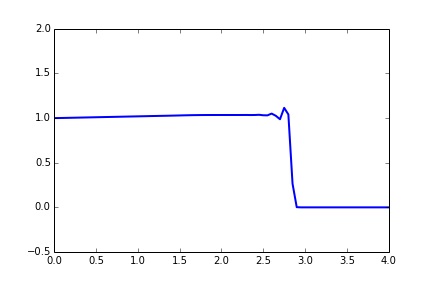
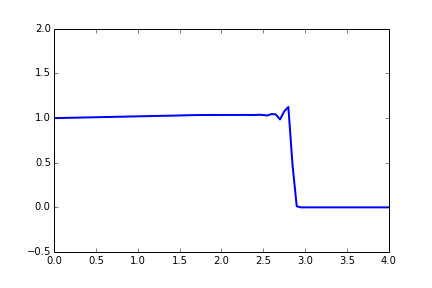
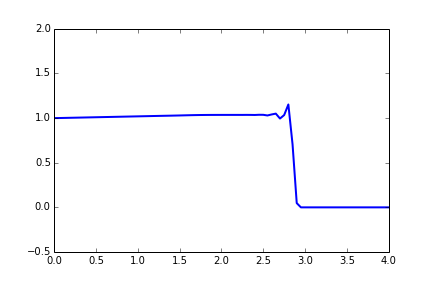
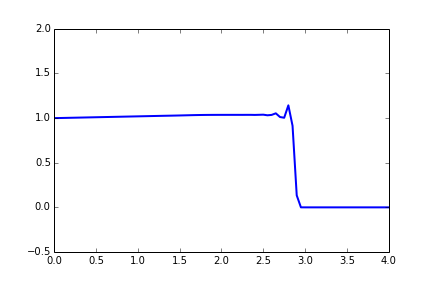
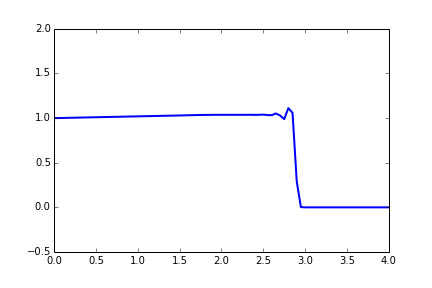
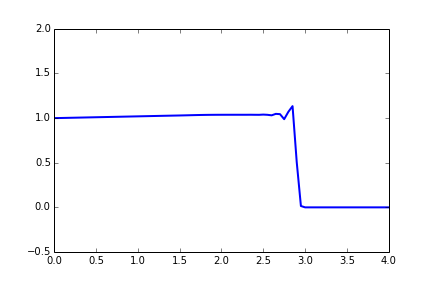
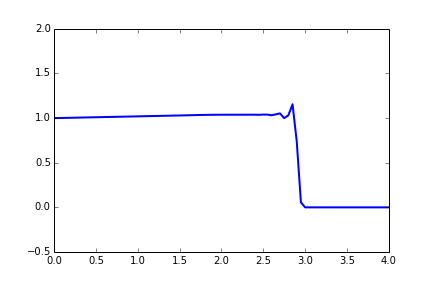
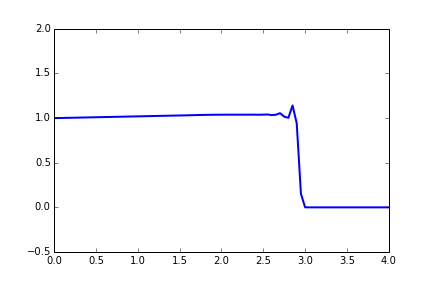
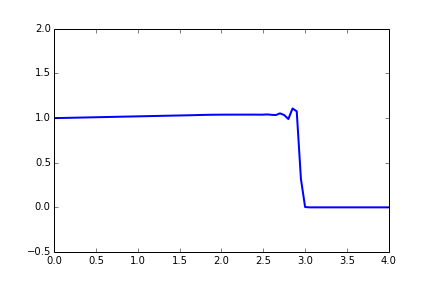
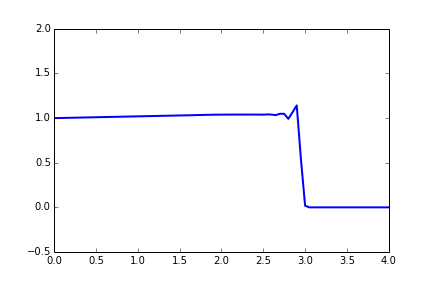
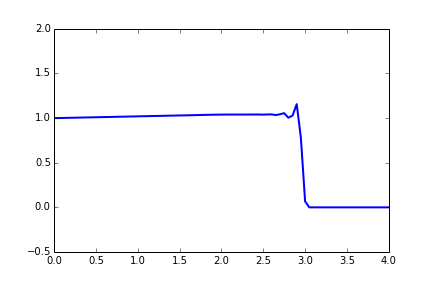
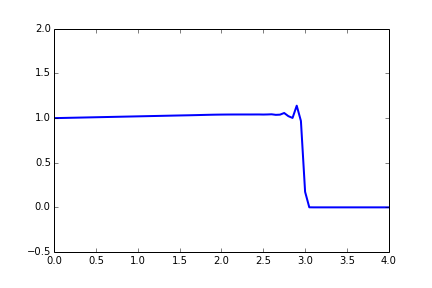
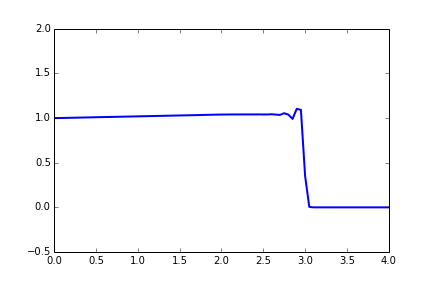
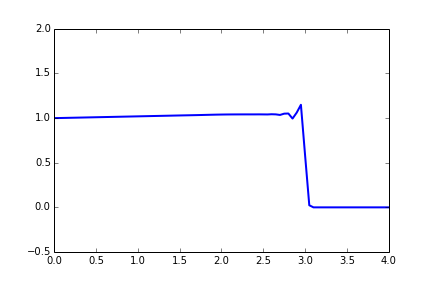
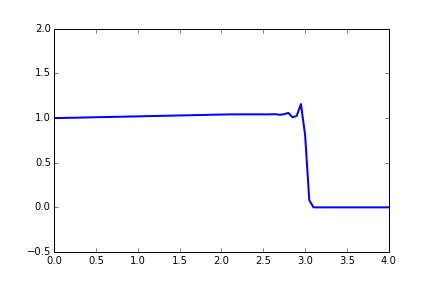
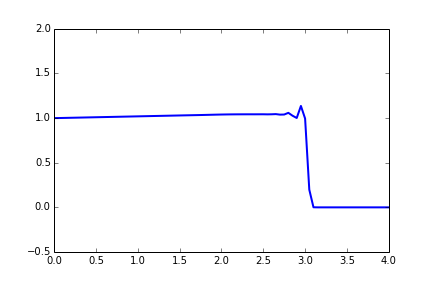
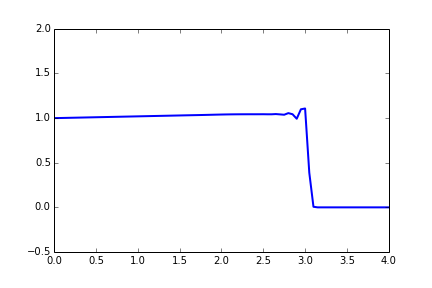
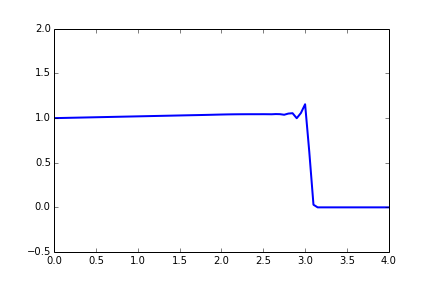
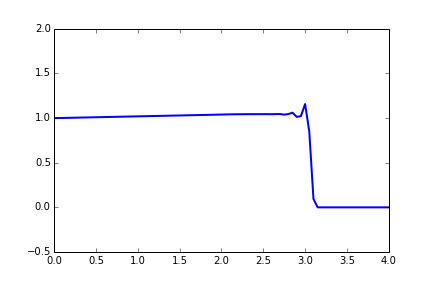
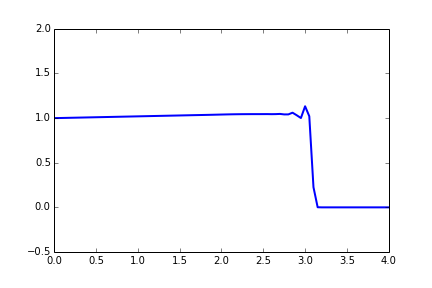
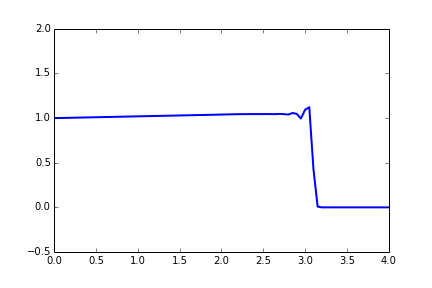
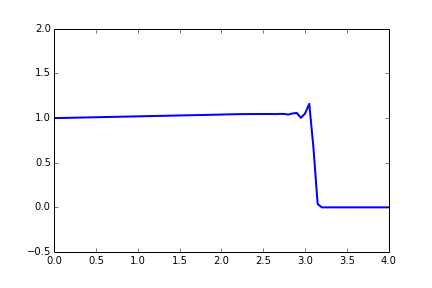
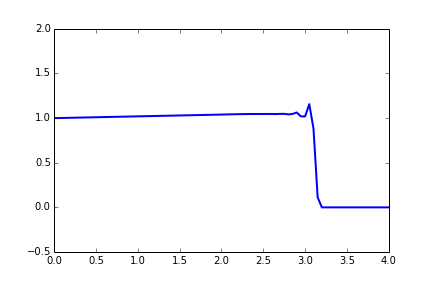
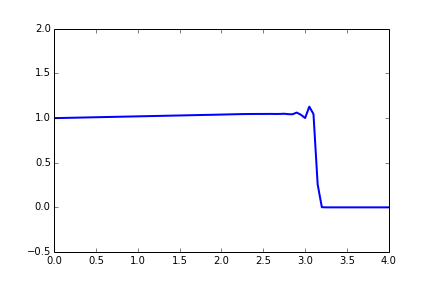
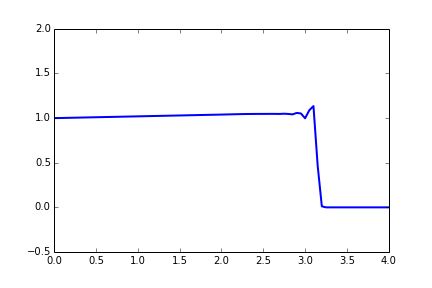
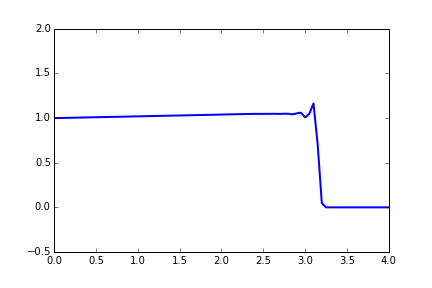
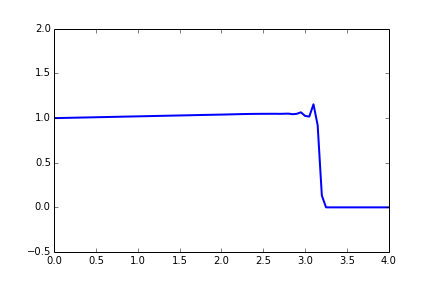
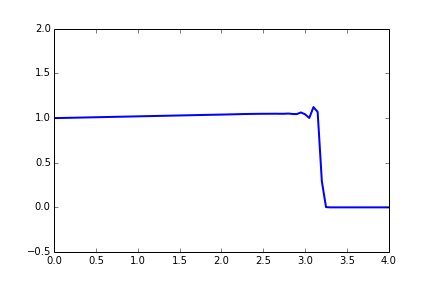
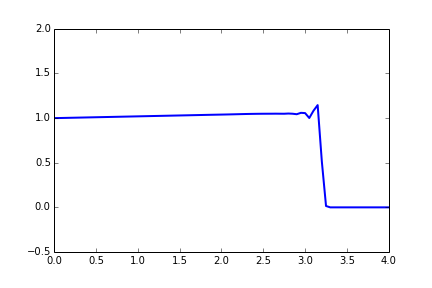
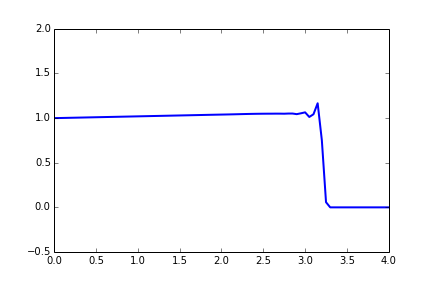
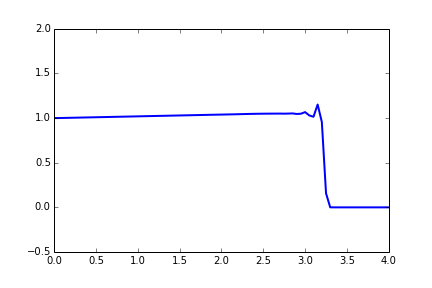
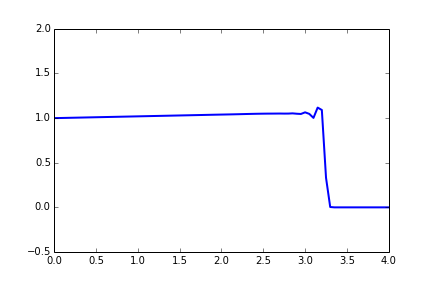
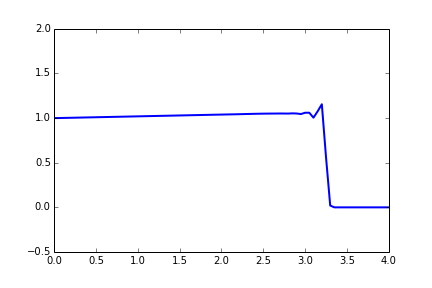
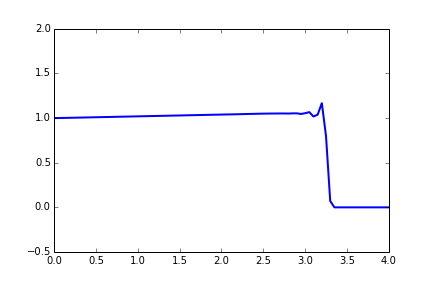
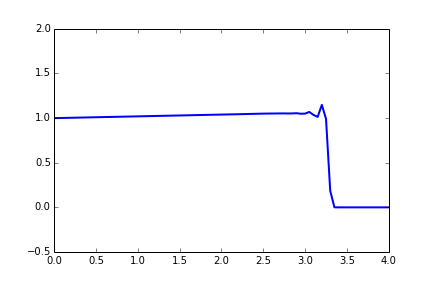
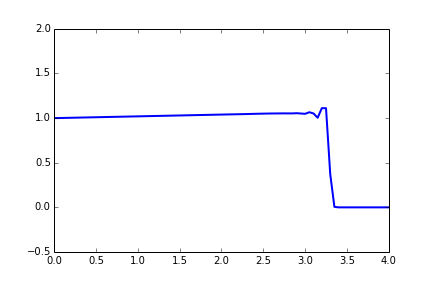
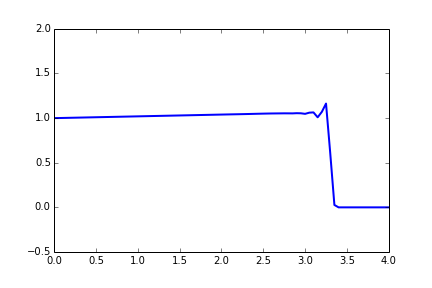
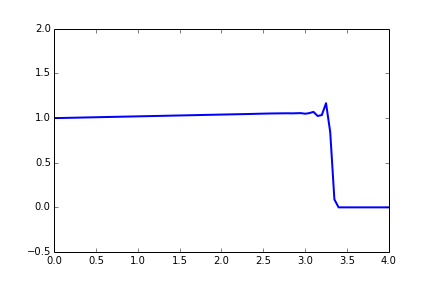
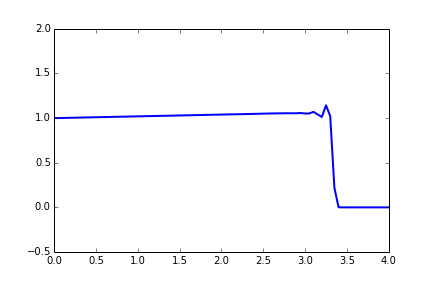
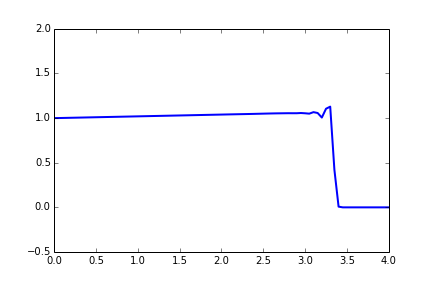
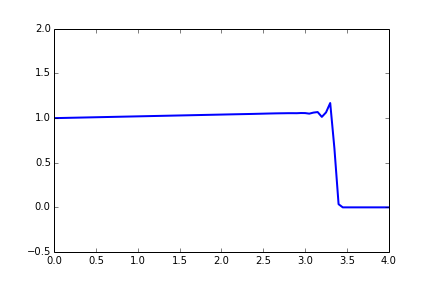
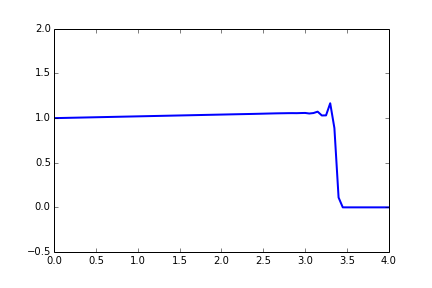
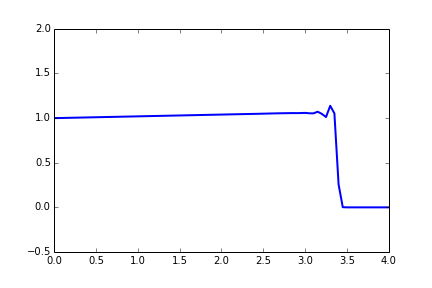
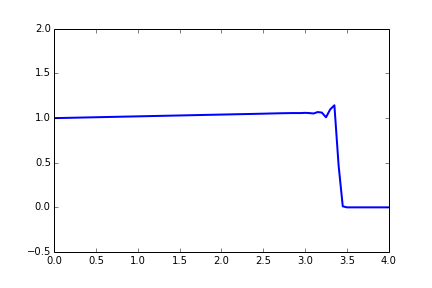
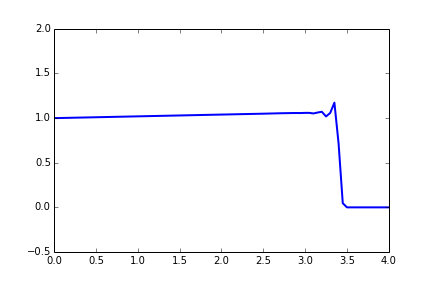
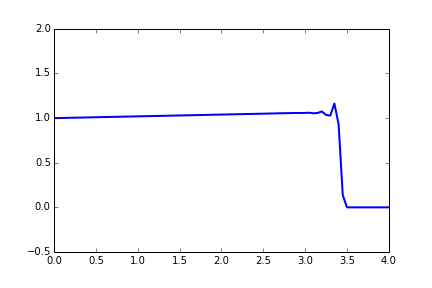
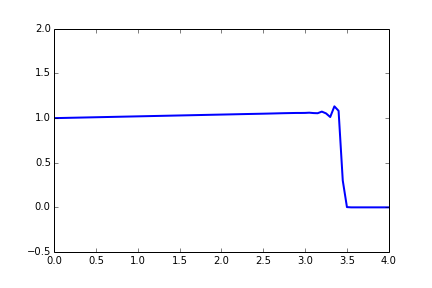
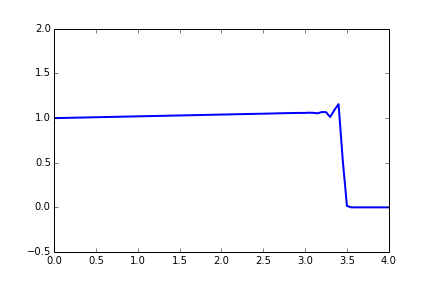
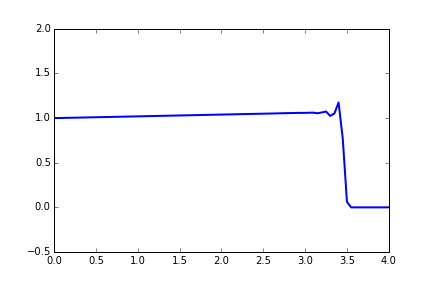
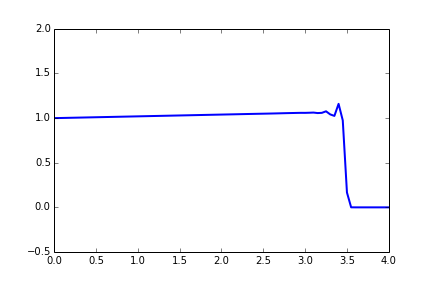
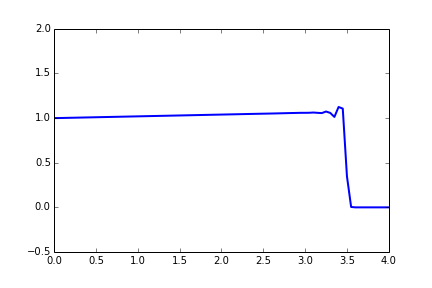
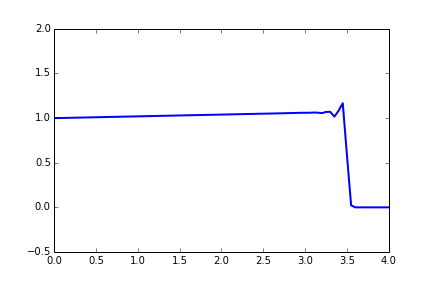
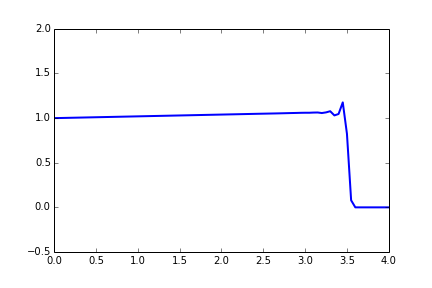
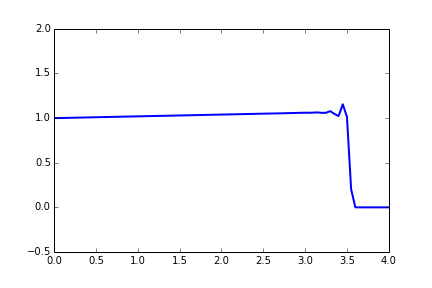
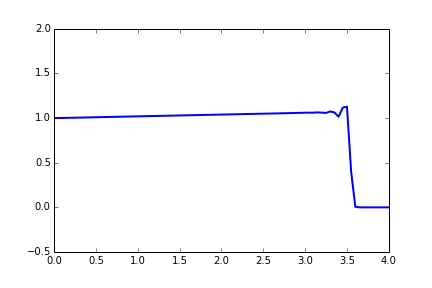
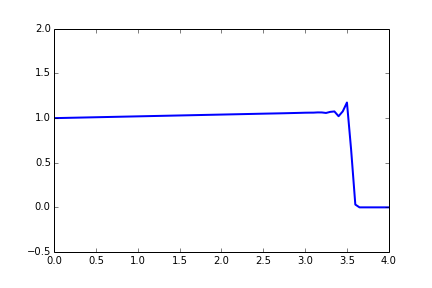
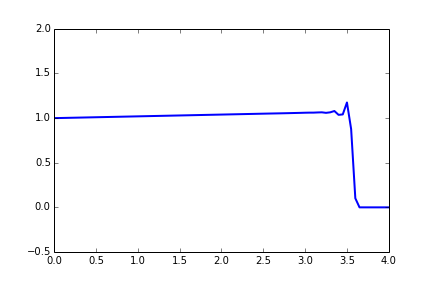
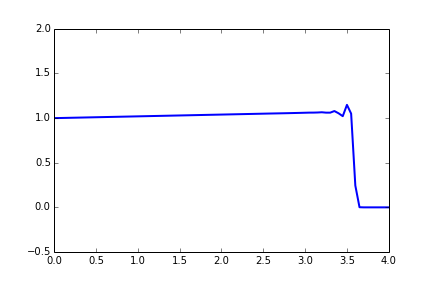
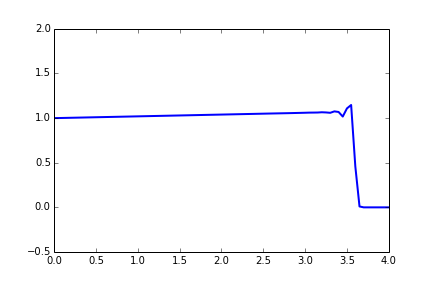
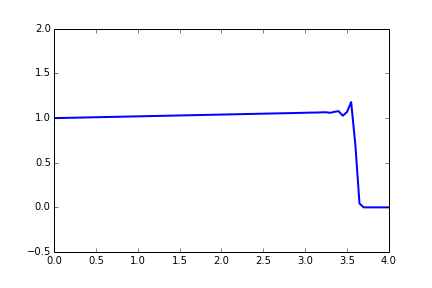
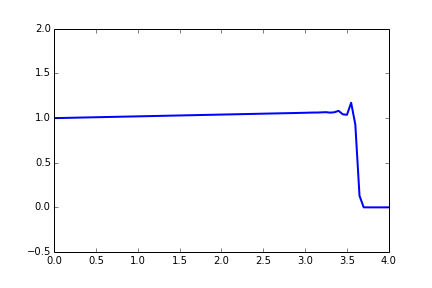
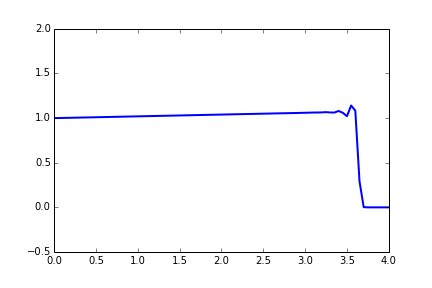
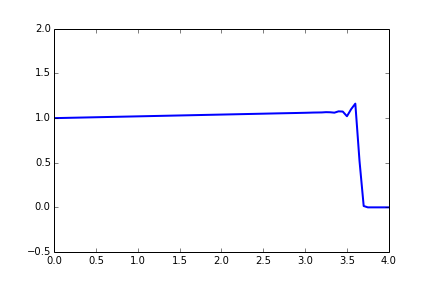
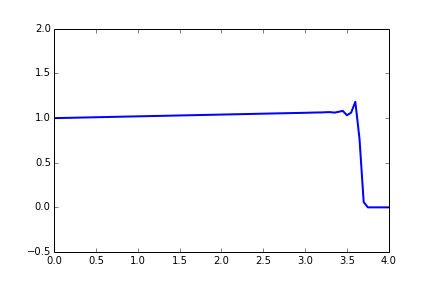
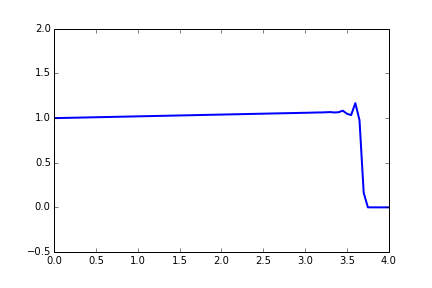
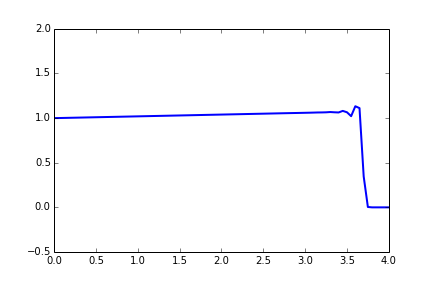
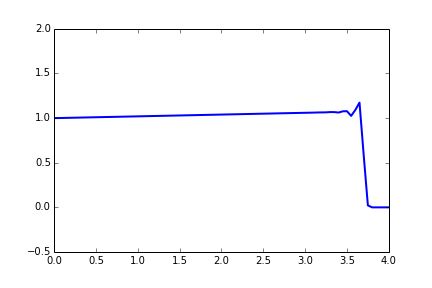
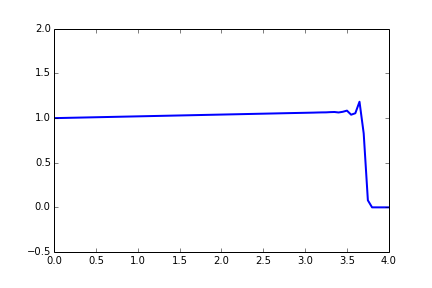
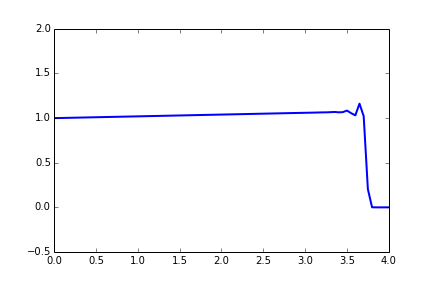
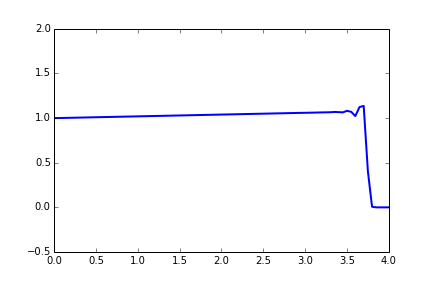
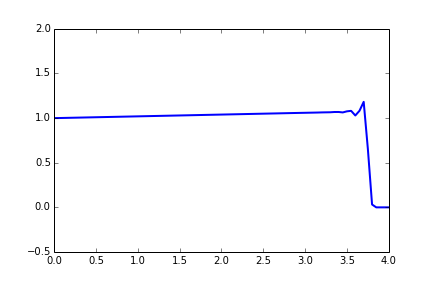
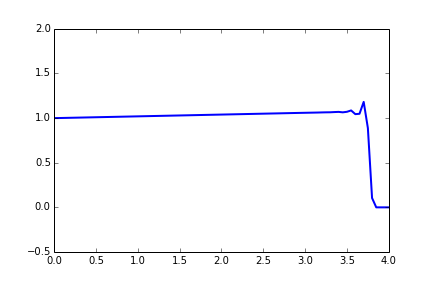

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
nx = 81
nt = 140
dx = 4.0/(nx-1)

epsilon=0.001

x = np.linspace(0,4,nx)

def u_initial(nx):
    u = np.ones(nx)
    u[nx/2:]=0
    return u

def computeF(u):
    return u**2/2.

def maccormack(u, nt, dt, dx):
    un = np.zeros((nt, len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    for t in range(1,nt):
        F = computeF(u)
        damping = epsilon*(u[2:] - u[1:-1] + u[:-2])
        ustar[:-1] = u[:-1]-dt/dx*(F[1:] - F[:-1])
        ustar[1:-1] += damping
        Fstar = computeF(ustar)
        un[t,1:]=0.5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:] - Fstar[:-1]))
        u = un[t].copy()
    return un

u = u_initial(nx)
sigma = .5
dt = sigma*dx

def animate(data):
    x = np.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

un = maccormack(u,nt,dt,dx)

fig=plt.figure()
ax = plt.axes(xlim=(0,4), ylim=(-0.5, 2))
line, = ax.plot([], [], lw=2)

anim = animation.FuncAnimation(fig, animate, frames=un, interval=30)
display_animation(anim, default_mode='loop')